# Importing The Neccesary Libraries

In [2]:
import nltk
import json
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import random
import warnings
warnings.filterwarnings('ignore')

# Dataset Preparetion

In [ ]:
intents = {
  "intents": [
    {
      "tag": "greeting",
      "patterns": ["Hi", "Hello", "Hey", "Good day", "How are you?"],
      "responses": ["Hello!", "Good to see you!", "Hi there, how can I help?"],
    },
    {
      "tag": "farewell",
      "patterns": ["Goodbye", "Bye", "See you later", "Talk to you later"],
      "responses": ["Sad to see you go :(", "Goodbye!", "Come back soon!"],

    },
    {
      "tag": "creator",
      "patterns": ["Who created you?", "Who is your developer?", "Who made you?"],
      "responses": ["I was created by Naveen."],

    },
    {
      "tag": "identity",
      "patterns": ["What is your name?", "What should I call you?", "Who are you?","What are you","Introduce Yourself"],
      "responses": ["You can call me Mind Reader. I'm a Chatbot."],

    },
    {
      "tag": "communication",
      "patterns": ["How can I communicate with the university or contact my ward?", "What are the communication channels for students and parents?"],
      "responses": ["You can communicate with the university through our official email, helpline number, or by visiting the respective department. For parents, we provide regular updates through email and dedicated portals."],

    },
    {
      "tag": "casual_greeting",
      "patterns": ["What's up?", "How are you?", "How you doing?"],
       "responses": ["I'm here to assist you with any questions or information you need. How can I assist you today?"]

     },
    {
      "tag": "good_morning",
      "patterns": ["Good morning", "Morning"],
      "responses": ["Good morning! How can I assist you today?"]

     },
     {
       "tag": "good_afternoon",
       "patterns": ["Good afternoon", "Afternoon"],
        "responses": ["Good afternoon! How can I assist you today?"]

      },
      {
      "tag": "good_evening",
      "patterns": ["Good evening", "Evening"],
       "responses": ["Good evening! How can I assist you today?"]

         },
          {
        "tag": "thank_you",
        "patterns": ["Thank you", "Thanks"],
        "responses": ["You're welcome! If you have any more questions, feel free to ask."]

        },
       {
       "tag": "sorry",
      "patterns": ["Sorry", "Apologies"],
       "responses": ["No problem! If there's anything else you need assistance with, feel free to let me know."]

    },
    {
      "tag": "hours",
      "patterns": ["What are the college timings?", "When is the college open?", "What are your hours of operation?"],
      "responses": ["The college is open from 8am to 5pm, Monday to Saturday."]

    },
    {
      "tag": "contact",
      "patterns": ["How can I contact the college?", "What is the college telephone number?", "Can I get your contact number?"],
      "responses": ["You can contact the college at 123456789."]

    },
    {
      "tag": "courses",
      "patterns": ["What courses are offered in the college?", "Can you tell me about the available courses?", "What are the branches in the college?"],
      "responses": ["The college offers courses in Information Technology, Computer Engineering, Mechanical Engineering, Chemical Engineering, and Civil Engineering."]

    },
    {
      "tag": "fees",
      "patterns": ["How much is the college fee?", "Tell me about the fees", "What are the hostel fees?"],
      "responses": ["For detailed fee information, please visit our college website."]

    },
    {
      "tag": "location",
      "patterns": ["Where is the college located?", "What is the college address?", "How can I reach the college?"],
      "responses": ["The college is located at [insert address]. You can find the location on Google Maps."]

    },
    {
      "tag": "hostel",
      "patterns": ["Does the college provide hostel facilities?", "Where is the hostel located?", "What are the hostel fees?"],
      "responses": ["For detailed information about the hostel, please visit our college website."]

    },
    {
      "tag": "events",
      "patterns": ["What events are organized in the college?", "Are there any upcoming events?", "Tell me about the college events."],
      "responses": ["For information about the events, please visit our college website."]

    },
    {
      "tag": "admission",
      "patterns": ["What is the admission process?", "How can I take admission in the college?", "Tell me about the admission criteria."],
      "responses": ["For detailed admission information, please visit our college website."]

    },
    {
      "tag": "library",
      "patterns": ["Does the college have a library?", "Where is the library located?", "What are the library timings?"],
      "responses": ["Yes, the college has a library. The library is located [insert location]. The timings are from 9am to 5pm, Monday to Friday."]

    },
    {
      "tag": "facilities",
      "patterns": ["What facilities are available in the college?", "Tell me about the college facilities.", "Do you have a sports complex?"],
      "responses": ["The college provides various facilities including a sports complex, labs, cafeteria, and a library."]

    },
    {
      "tag": "placement",
      "patterns": ["How are the placements in the college?", "Tell me about the college placements.", "What is the placement record?"],
      "responses": ["The college has a good placement record. Many reputed companies visit our campus for recruitment."],

    },
    {
      "tag": "school_choice",
      "patterns": ["Why did you choose this school?", "What made you decide to attend this college?"],
      "responses": ["I chose this school because of its strong academic reputation, excellent faculty, and a wide range of courses offered."]

    },
    {
      "tag": "happiness",
      "patterns": ["Are you happy here?", "Do you enjoy being at this college?"],
      "responses": ["As an AI, I don't have emotions, but I'm here to assist and provide information about the college."]

    },
    {
      "tag": "strengths",
      "patterns": ["What are your school's strengths?", "What makes your college stand out?"],
      "responses": ["Our college excels in providing quality education, fostering a supportive learning environment, and offering a wide range of extracurricular activities."]

    },
    {
      "tag": "complaints",
      "patterns": ["What's your #1 complaint about your school?", "What do you think needs improvement in your college?"],
      "responses": ["While my purpose is to provide information, some students may have different opinions. It's always good to provide feedback for continuous improvement."]

    },
    {
      "tag": "improvements",
      "patterns": ["What else could stand to be improved?", "In which areas do you think your college can improve?"],
      "responses": ["Continuous improvement is essential for any institution. Areas that can be considered for improvement include infrastructure, facilities, and student support services."],

    },
    {
      "tag": "accessibility",
      "patterns": ["How accessible are administrators, registrars, financial aid officers, etc.?", "Can students easily reach out to college staff when needed?"],
      "responses": ["The college administration strives to maintain accessibility for students. Office hours and contact information for various staff members are available for student assistance."],

    },
    {
      "tag": "academics_majors",
      "patterns": ["What majors are popular?", "Which fields of study have a high enrollment?", "What are the most sought-after majors in your college?"],
      "responses": ["Popular majors in our college include Computer Science, Business Administration, Psychology, Engineering, and Biology."],

    },
    {
      "tag": "academics_reputation",
      "patterns": ["What departments or programs have the best reputations?", "Which academic programs are well-regarded?", "Are there any standout departments in your college?"],
      "responses": ["Our college has well-regarded departments in Computer Science, Engineering, and Business Administration. These programs have a strong reputation for academic excellence."],

    },
    {
      "tag": "favorite_class",
      "patterns": ["What's your favorite class?", "Which class do you enjoy the most?", "Do you have a favorite subject?"],
      "responses": ["As an AI, I don't have personal preferences. However, students often enjoy classes that align with their interests and career goals."],

    },
    {
      "tag": "professors_teachers",
      "patterns": ["Are your professors good teachers?", "How is the quality of teaching at your college?", "Do you have experienced faculty?"],
      "responses": ["Our college prides itself on having experienced and dedicated faculty members who are committed to providing quality education."],

    },
    {
      "tag": "professors_office_hours",
      "patterns": ["Do your professors hold office hours, and will they meet with you outside of class?", "Are professors available for one-on-one meetings?", "Can students easily meet with professors?"],
      "responses": ["Most professors at our college hold regular office hours and are available for one-on-one meetings to address student queries and provide additional guidance."],

    },
    {
      "tag": "professors_vs_TAs",
      "patterns": ["Are most of your classes taught by professors or teaching assistants?", "Who primarily teaches the classes?", "Do you have a lot of classes taught by TAs?"],
      "responses": ["The majority of classes at our college are taught by professors. However, in some cases, teaching assistants may assist with course instruction or hold discussion sessions."],

    },
    {
      "tag": "first_choice_classes",
      "patterns": ["Were you able to take most of your first-choice classes?", "Do students generally get their preferred classes?", "How likely are you to get into your desired classes?"],
      "responses": ["While course availability can vary, our college aims to accommodate students' preferences as much as possible. Course registration is conducted on a first-come, first-served basis."],

    },
    {
      "tag": "class_format",
      "patterns": ["Are your classes lecture-based or discussion-based?", "How are the classes structured?", "What's the typical format of a class?"],
      "responses": ["The class format can vary depending on the subject and the instructor's teaching style. Some classes may be lecture-based, while others may involve more interactive discussions and group activities."],

    },
    {
      "tag": "reading_writing",
      "patterns": ["How much reading and writing is required in your courses?", "Are there a lot of assignments involving reading and writing?", "Is there a heavy emphasis on written work?"],
      "responses": ["The amount of reading and writing required in courses can vary. Generally, students can expect a balanced mix of reading assignments, written projects, and exams."],

    },
    {
      "tag": "collaborative_work",
      "patterns": ["How often are collaborative work or group presentations required?", "Do you have a lot of group projects?", "Is there an emphasis on teamwork?"],
      "responses": ["Collaborative work and group presentations are part of the learning experience at our college. Students often engage in group projects to enhance teamwork and develop important skills."],

    },
    {
      "tag": "academic_advising",
      "patterns": ["How satisfied are you with academic advising?", "Is the academic advising program helpful?", "Do advisors provide guidance for course selection?"],
      "responses": ["Academic advising plays a crucial role in guiding students' academic journeys. Our college has dedicated advisors who provide assistance with course selection, degree planning, and academic support."],

    },
    {
      "tag": "tutoring_programs",
      "patterns": ["Do students use any on-campus tutoring programs or writing centers?", "Are there resources available for academic support?", "How can I get tutoring assistance?"],
      "responses": ["Our college provides on-campus tutoring programs and writing centers to support students in their academic endeavors. These resources can help students with subject-specific assistance and writing skills."],

    },
    {
      "tag": "class_size",
      "patterns": ["How big are your classes?", "Are the class sizes large or small?", "Do you have small class sizes?"],
      "responses": ["Class sizes can vary depending on the course and program. While some classes may have a larger enrollment, others, especially upper-level courses, tend to have smaller class sizes for more personalized attention."],

    },
    {
      "tag": "independent_study",
      "patterns": ["Does your major require an independent study or capstone project?", "Are there opportunities for independent research?", "Is there a culminating project for your major?"],
      "responses": ["Many majors at our college offer opportunities for independent study or capstone projects. These experiences allow students to delve deeper into their fields of interest and apply their knowledge."],

    },
    {
      "tag": "professor_research",
      "patterns": ["Are professors available for research with students?", "Can students engage in research projects with faculty?", "How can I get involved in research at your college?"],
      "responses": ["Faculty members at our college actively engage in research, and students often have opportunities to collaborate on research projects. You can reach out to professors in your field of interest to inquire about research opportunities."],

    },
    {
      "tag": "study_abroad",
      "patterns": ["Is it popular to study abroad?", "Are there study abroad programs available?", "Can students spend a semester abroad?"],
      "responses": ["Studying abroad is a popular option for many students at our college. We offer various study abroad programs and opportunities to experience different cultures and gain international exposure."],

    },
    {
      "tag": "first_year_experience",
      "patterns": ["What's it like to be a first-year student here?", "Can you describe the first-year experience?", "What should I expect as a freshman?"],
      "responses": ["As a first-year student, you can expect a supportive and welcoming environment. Orientation programs, peer mentoring, and academic support services are available to help you transition smoothly into college life."],

    },
    {
      "tag": "typical_day",
      "patterns": ["What's a typical day like?", "Can you describe a day in the life of a student?", "What's the daily routine at your college?"],
      "responses": ["A typical day as a student involves attending classes, engaging in study sessions, participating in extracurricular activities, and utilizing campus resources. Each student's daily routine may vary based on their schedule and interests."],

    },
    {
      "tag": "study_time",
      "patterns": ["How much time do students spend studying per week?", "Is there a lot of studying required?", "What's the average study time for students?"],
      "responses": ["The amount of time students spend studying can vary depending on their course load, study habits, and personal preferences. On average, students dedicate several hours per week to studying."],

    },
    {
      "tag": "non_class_activities",
      "patterns": ["What do you do when you're not in class?", "How do students spend their free time?", "Are there activities to do outside of class?"],
      "responses": ["Outside of class, students engage in various activities such as participating in clubs and organizations, attending campus events, exploring the surrounding community, and spending time with friends."],

    },
    {
      "tag": "weekend_activities",
      "patterns": ["What do you do on the weekends?", "Are there weekend activities or events?", "How do students spend their weekends?"],
      "responses": ["On weekends, students often take part in campus events, recreational activities, social gatherings, and may also use the time for relaxation and personal pursuits."],

    },
    {
      "tag": "social_scene",
      "patterns": ["What is the social scene like?", "How would you describe the social life on campus?", "Are there opportunities to meet new people?"],
      "responses": ["The social scene on campus is vibrant and diverse. There are plenty of opportunities to meet new people, join clubs and organizations, attend social events, and build lifelong friendships."],

    },
    {
      "tag": "hometown_activities",
      "patterns": ["What kinds of things are there to do in your school's hometown?", "Are there recreational activities in the local area?", "What are some popular attractions near the college?"],
      "responses": ["Our school's hometown offers a range of recreational activities, cultural events, shopping centers, restaurants, and natural attractions. You can explore local parks, museums, theaters, and enjoy the local cuisine."],

    },
    {
      "tag": "food",
      "patterns": ["How's the food?", "What is the quality of the food on campus?", "Are there good dining options?"],
      "responses": ["The college provides a variety of dining options on campus, including cafeterias, food courts, and specialty restaurants. The quality of food is generally satisfactory, with options to cater to different dietary preferences."],

    },
    {
      "tag": "on_campus_housing",
      "patterns": ["Do most students live on-campus?", "Are there on-campus housing options?", "What percentage of students live in dorms?"],
      "responses": ["While the availability of on-campus housing may vary, many students choose to live in dorms or residence halls provided by the college. Off-campus housing options are also available for students."],

    },
    {
      "tag": "dorm_quality",
      "patterns": ["How are the dorms?", "Are the dormitories comfortable?", "What's the quality of on-campus housing?"],
      "responses": ["The quality of dormitories varies based on the specific residence halls. Generally, the college strives to provide comfortable and convenient living spaces with amenities that cater to students' needs."],

    },
    {
      "tag": "popular_clubs",
      "patterns": ["Which clubs and student organizations are popular?", "Are there any standout clubs on campus?", "What are some of the most active student organizations?"],
      "responses": ["Our college has a wide range of clubs and student organizations catering to diverse interests. Popular clubs include academic organizations, cultural clubs, sports teams, community service groups, and more."],

    },
    {
      "tag": "fraternities_sororities",
      "patterns": ["Do lots of students belong to fraternities or sororities?", "Are there many Greek organizations on campus?", "What's the Greek life like at your college?"],
      "responses": ["While the presence and prominence of fraternities and sororities can vary among colleges, our college does have a Greek life community. Participation in these organizations is a personal choice for interested students."],

    },
    {
      "tag": "favorite_place_on_campus",
      "patterns": ["What's your favorite place on campus?", "Which location do you enjoy the most?", "Where do students like to hang out?"],
      "responses": ["As an AI, I don't have personal preferences. However, many students enjoy spending time in common areas, libraries, student centers, outdoor spaces, and campus cafeterias."],

    },
    {
      "tag": "study_locations",
      "patterns": ["Where do you like to study?", "What are some good study spots?", "Are there quiet places to study on campus?"],
      "responses": ["There are several study spots on campus, including libraries, study lounges, coffee shops, and outdoor seating areas. It's important to find a location that suits your study preferences and helps you focus."],

    },
    {
      "tag": "campus_facilities",
      "patterns": ["What are the facilities like (science labs, libraries, theaters, gyms, etc.)?", "Are the campus facilities well-maintained?", "Does the college have modern facilities?"],
      "responses": ["Our college prides itself on maintaining well-equipped facilities to support students' academic and extracurricular activities. This includes modern science labs, libraries with extensive resources, theaters, and well-equipped gyms."],

    },
    {
      "tag": "computer_labs",
      "patterns": ["Are there enough computer labs?", "How accessible are the computer labs?", "Is there a shortage of computer lab facilities?"],
      "responses": ["Our college provides an ample number of computer labs across campus. These labs are accessible to students and equipped with the necessary technology and software needed for academic work."],

    },
    {
      "tag": "campus_wifi",
      "patterns": ["How is the WiFi on campus?", "Is the campus WiFi reliable?", "Are there any connectivity issues with the WiFi?"],
      "responses": ["The campus WiFi network is designed to provide reliable internet connectivity to students, faculty, and staff. However, occasional connectivity issues may arise, which are usually promptly addressed by the IT department."],

    },
    {
      "tag": "campus_navigation",
      "patterns": ["Is it easy to get around campus?", "Are the campus buildings easy to navigate?", "Is the campus layout student-friendly?"],
      "responses": ["The campus is designed to be student-friendly, and campus buildings are typically well-marked and easy to navigate. Campus maps, signage, and digital resources are available to help students find their way around."],

    },
    {
      "tag": "sports_popularity",
      "patterns": ["Are sports popular?", "Do many students participate in sports?", "What's the athletic culture like at your college?"],
      "responses": ["Sports are popular at our college, and many students participate in various athletic activities. We have a range of sports teams, intramural sports, and fitness programs to cater to different interests and skill levels."],

    },
    {
      "tag": "school_spirit",
      "patterns": ["Is there a lot of school spirit?", "Do students show a strong sense of school pride?", "Are there spirited events or traditions?"],
      "responses": ["Our college has a vibrant school spirit, and students often show a strong sense of pride in their institution. There are spirited events, traditions, and opportunities to engage with the college community and showcase school pride."],

    },
    {
      "tag": "fellow_students",
      "patterns": ["How would you describe your fellow students?", "What are the students like?", "Is there a sense of community among students?"],
      "responses": ["The student body is diverse and inclusive, with individuals from various backgrounds, interests, and experiences. Students generally foster a sense of community and support each other's academic and personal growth."],

    },
    {
      "tag": "friendly_students",
      "patterns": ["Are the students here friendly?", "Is it easy to make friends?", "Do students interact with each other?"],
      "responses": ["Yes, the students here are generally friendly and welcoming. The college environment provides ample opportunities to meet new people, make friends, and form meaningful connections both inside and outside the classroom."],

    },
    {
      "tag": "student_body_unique",
      "patterns": ["What makes the student body unique?", "Is there anything special about the student population?", "What sets the students apart at your college?"],
      "responses": ["The student body at our college is unique in its diversity of backgrounds, perspectives, talents, and passions. This diversity fosters a rich learning environment and encourages students to embrace different cultures and viewpoints."],

    },
    {
      "tag": "campus_diversity",
      "patterns": ["Is there diversity on campus?", "Are there students from different cultural backgrounds?", "Does the college promote diversity and inclusion?"],
      "responses": ["Yes, our college values diversity and strives to create an inclusive campus community. Students from different cultural backgrounds, ethnicities, and countries contribute to the diverse fabric of our college community."],

    },
    {
      "tag": "international_students",
      "patterns": ["Are there many students from other countries?", "Do you have a significant international student population?", "How diverse is the international representation at your college?"],
      "responses": ["Our college welcomes students from around the world, and we have a diverse international student population. International students contribute to the cultural exchange and global perspectives within the college community."],

    },
    {
      "tag": "interactions_among_students",
      "patterns": ["Do students of different races and classes interact easily?", "Is there interaction and socialization among diverse groups?", "Do students embrace diversity and engage in cross-cultural interactions?"],
      "responses": ["Students at our college have opportunities to interact and socialize with peers from different races, classes, and cultural backgrounds. The college promotes a welcoming and inclusive environment that encourages cross-cultural interactions and understanding."],

    },
    {
      "tag": "student_cliques",
      "patterns": ["Are students cliquish?", "Is there a presence of cliques on campus?", "Do students segregate into exclusive groups?"],
      "responses": ["While some social groups may naturally form based on shared interests and affiliations, our college encourages inclusivity and fosters an environment where students from different backgrounds can mingle and form connections beyond cliques."],

    },
    {
      "tag": "internship_opportunities",
      "patterns": ["Are internships available? How do you find them?", "What internship opportunities are there?", "How does the college support students in finding internships?"],
      "responses": ["Internship opportunities are available for students, and the college often provides resources and support to help students find and secure internships. The college's career services office and faculty advisors can offer guidance in exploring and applying for internships."],

    },
    {
      "tag": "career_services",
      "patterns": ["Is Career Services helpful?", "What services does the career center provide?", "How effective is the college's career guidance?"],
      "responses": ["Career Services at our college offers various resources and assistance to help students with career exploration, resume building, job search strategies, interview preparation, and more. Many students find the career guidance helpful in their professional development."],

    },
    {
      "tag": "mentorship_program",
      "patterns": ["Do you have a mentor?", "Is there a mentorship program?", "How can students connect with mentors?"],
      "responses": ["Our college may have a mentorship program or opportunities for students to connect with mentors. These programs facilitate valuable guidance and support from experienced individuals who can provide insights and advice on academic and career paths."],

    },
    {
      "tag": "co-op_program",
      "patterns": ["Does your school have a co-op program?", "Are there cooperative education opportunities?", "How does the college support students in co-op experiences?"],
      "responses": ["Some colleges offer co-op programs where students can gain practical work experience related to their field of study while earning academic credit. If our college has a co-op program, students can explore such opportunities with the support of the college's career services or cooperative education office."],

    },
    {
      "tag": "leadership_opportunities",
      "patterns": ["What options exist for leadership skills on campus?", "Are there leadership programs or positions?", "How can students develop leadership skills?"],
      "responses": ["Our college offers various opportunities for students to develop leadership skills. Students can join student government, clubs, or organizations that provide leadership positions, participate in leadership workshops or programs, and engage in community service to foster leadership qualities."],

    },
    {
      "tag": "service_learning",
      "patterns": ["What options exist for service learning in the community?", "Are there community service programs?", "How can students get involved in community service?"],
      "responses": ["Our college often encourages service learning and community engagement. Students can get involved in community service programs, volunteer with local organizations, participate in service-learning courses, or join campus initiatives dedicated to making a positive impact in the community."],

    },
    {
      "tag": "employer_recruitment",
      "patterns": ["Do employers recruit students on campus?", "Are there career fairs or job fairs?", "How does the college connect students with potential employers?"],
      "responses": ["Employer recruitment is a common practice at many colleges. Career fairs, job fairs, and networking events are organized to connect students with potential employers. The college's career services office often plays a role in facilitating these connections."],

    },
    {
      "tag": "summer_jobs",
      "patterns": ["How easy is it to find summer jobs and other kinds of work through your school?", "Are there resources for finding summer employment?", "Does the college assist with summer job opportunities?"],
      "responses": ["Our college may provide resources and support to help students find summer jobs and other types of employment. The career services office, online job boards, and networking events can be valuable in exploring and securing summer job opportunities."]
    },
    {
      "tag": "notable_graduates",
      "patterns": ["Who are some of the notable graduates from your college?", "Can you mention any famous alumni?", "Which successful individuals attended your college?"],
      "responses": ["Our college has a distinguished list of notable graduates and successful alumni in various fields. Some may include renowned professionals, entrepreneurs, artists, scientists, and leaders who have made significant contributions to their respective fields."]

    },
    {
      "tag": "alumni_association",
      "patterns": ["How visible is your school's alumni association on campus?", "Does the college have an active alumni network?", "Are there opportunities to connect with alumni?"],
      "responses": ["Many colleges have active alumni associations that offer networking opportunities, mentorship programs, and career support for current students. The visibility and engagement of the alumni association can vary, but efforts are often made to connect students with alumni."]

    },
    {
      "tag": "hands-on_experiences",
      "patterns": ["What kinds of hands-on or practical experiences have you had in and outside of the classroom?", "Are there opportunities for practical learning?", "How does the college emphasize experiential learning?"],
      "responses": ["Colleges often provide opportunities for hands-on and practical experiences both inside and outside the classroom. These may include internships, research projects, fieldwork, service-learning, study abroad programs, and collaborative projects that enhance the learning process and offer real-world application of knowledge."]
    },{
    "tag": "special_features",
    "patterns": ["What makes this college or university special?", "What sets your college apart from others?", "What unique programs or opportunities does the college offer?", "Tell me about any distinctive features of your college.", "What are the college's strengths or unique selling points?"],
    "responses": ["Our college is known for its strong commitment to hands-on learning, extensive study abroad programs, and a vibrant campus community. We also take pride in our cutting-edge research facilities and a faculty deeply dedicated to student success."]
  },
  {
    "tag": "college_pride",
    "patterns": ["What is this school proud of?", "What accomplishments or achievements is the college known for?", "What makes students proud to attend this college?", "Tell me about the college's notable achievements.", "How does the college showcase its achievements?"],
    "responses": ["Our college takes great pride in its diverse and inclusive community, high-quality academic programs, and successful graduates who make significant contributions in various fields. We also celebrate our strong alumni network and the positive impact they have on society."]
  },
  {
    "tag": "undergraduate_students",
    "patterns": ["How many undergraduate students attend this school?", "What is the size of the undergraduate student body?", "Can you tell me the total undergraduate enrollment?", "What is the average undergraduate class size?", "How many students are in the freshman class?"],
    "responses": ["Our college has approximately [X] undergraduate students. The average undergraduate class size is typically around [Y] students, ensuring a personalized and engaging learning experience for our students."]
  },
  {
    "tag": "graduate_students",
    "patterns": ["How many graduate students attend?", "What is the size of the graduate student population?", "Can you tell me the total graduate enrollment?", "What graduate programs does the college offer?", "What percentage of students are in graduate programs?"],
    "responses": ["Our college has a diverse graduate student population of approximately [X] students. We offer a wide range of graduate programs that cater to various academic and professional interests."]
  },
  {
    "tag": "campus_diversity",
    "patterns": ["How diverse is this campus?", "What is the demographic breakdown of the student body?", "Does the college have a diverse student population?", "Tell me about the campus's commitment to diversity and inclusion.", "Are there any diversity-related events or initiatives on campus?"],
    "responses": ["Our college is committed to promoting diversity and inclusion. We have a diverse student body representing various cultural backgrounds, ethnicities, and identities, enriching our campus community and fostering cross-cultural understanding."]
  },
  {
    "tag": "financial_stability",
    "patterns": ["How financially sound is this school?", "Is the college financially stable?", "Does the college face any financial challenges?", "What is the college's endowment size?", "How does the college manage its financial resources?"],
    "responses": ["Our college maintains financial stability through careful budget management, prudent financial practices, and a strong endowment. We are committed to providing students with a high-quality education and ensuring long-term sustainability."]
  },
  {
    "tag": "bond_rating",
    "patterns": ["What is this school's bond rating?", "How does the college's bond rating affect its financial standing?", "What is the college's credit rating?", "Can you provide information about the college's financial ratings?", "How does the college use its bond rating to secure funds?"],
    "responses": ["Our college's bond rating is [X], which indicates a strong creditworthiness and financial stability. A higher bond rating allows the college to secure funds at more favorable interest rates, supporting various campus projects and initiatives."]
  },
  {
    "tag": "average_class_size_intro",
    "patterns": ["What is the average class size of introductory courses?", "How many students are typically in introductory classes?", "Are introductory courses large or small?", "Do introductory classes have a large number of students?", "How much individual attention can students expect in introductory courses?"],
    "responses": ["Introductory courses at our college usually have an average class size of [Y] students. Our faculty is committed to providing individual attention and support to students, ensuring a valuable learning experience."]
  },
  {
    "tag": "average_class_size_upper_division",
    "patterns": ["What is the average class size of upper-division courses?", "Are upper-division classes large or small?", "Do upper-division courses have a large number of students?", "How much individual attention can students expect in upper-division courses?", "Are upper-level classes more or less intimate than introductory classes?"],
    "responses": ["Upper-division courses at our college typically have an average class size of [Y] students. The smaller class sizes allow for more personalized interactions between students and faculty, fostering a collaborative learning environment."]
  },
  {
    "tag": "teaching_assistants",
    "patterns": ["How often are teaching assistants used?", "Are teaching assistants involved in teaching classes?", "Do teaching assistants lead discussions or labs?", "How accessible are teaching assistants to students?", "What role do teaching assistants play in student support?"],
    "responses": ["Teaching assistants are utilized in certain courses at our college to support faculty and enhance the learning experience. They may assist in leading discussions, labs, or grading assignments. Teaching assistants are typically accessible to students during office hours for additional help."]
  },
  {
    "tag": "course_enrollment_ease",
    "patterns": ["How easy or difficult is it to enroll in the courses you need?", "Is course registration a straightforward process?", "Are students able to get into their preferred courses?", "Do students encounter any challenges during course registration?", "How does the college ensure students can enroll in required courses?"],
    "responses": ["Course enrollment at our college is generally a straightforward process, and efforts are made to accommodate students' preferences. Academic advisors are available to assist students in selecting the right courses and ensuring they can enroll in the classes they need to progress in their academic journey."]
  },
  {
    "tag": "interaction_with_professors",
    "patterns": ["How much interaction, if any, will the typical undergrad have with tenured professors?", "Will interaction with tenured professors be limited to lecture halls?", "What opportunities are there for students to interact with professors outside of class?", "Do professors hold regular office hours for students?", "Is there a chance to collaborate with professors on research projects?"],
    "responses": ["Our college promotes meaningful interactions between students and tenured professors. While some lectures may have larger class sizes, professors often hold regular office hours to provide individual support and guidance. Students may also have opportunities to collaborate with professors on research projects or join academic clubs led by faculty."]
  },
  {
    "tag": "typical_class_sizes_major",
    "patterns": ["What are the typical class sizes of my intended major?", "Are classes in my intended major generally large or small?", "How much individual attention can students expect in their major-related courses?", "Are major-specific classes more intimate than general courses?", "Will my major classes involve close interactions with faculty?"],
    "responses": ["Class sizes within your intended major at our college vary depending on the specific courses and program. In general, major-related classes tend to be smaller, allowing for more personalized interactions with faculty and fellow students."]
  },
  {
    "tag": "impacted_majors",
    "patterns": ["Is my intended discipline an impacted/oversubscribed major?", "Are there any limitations on enrollment in my intended major?", "Do certain majors have restricted enrollment?", "What majors are most popular among students?", "How competitive is it to get into specific majors?"],
    "responses": ["Some majors at our college may be impacted or have restricted enrollment due to high demand. However, we strive to accommodate students' academic interests and provide support in exploring alternative pathways if needed."]
  },
  {
    "tag": "guaranteed_major",
    "patterns": ["Am I guaranteed the major that I’m interested in?", "Is there a direct admission process for my intended major?", "How does the college handle declaring a major?", "Is it possible to change majors after enrollment?", "What is the process for switching to a different major?"],
    "responses": ["While direct admission to certain majors may be available, the declaration of a major often occurs after the first year of study. Our college encourages exploration and offers academic advisors to assist students in choosing the right major based on their interests and goals."]
  },
  {
    "tag": "major_admission_standards",
    "patterns": ["Are the admission standards higher for certain majors?", "Do different majors have different admission requirements?", "What are the requirements for getting into competitive majors?", "Do some majors have limited availability?", "What GPA and prerequisites are needed for specific majors?"],
    "responses": ["Certain majors at our college may have specific admission requirements due to their competitive nature or limited availability. These requirements may include prerequisite courses, GPA thresholds, or a portfolio review, depending on the program."]
  },
  {
    "tag": "declaring_major",
    "patterns": ["When do you have to declare a major?", "What is the timeline for declaring a major?", "Is there a deadline for choosing a major?", "Are students required to declare a major immediately?", "Is there flexibility in declaring a major?"],
    "responses": ["At our college, students typically have the flexibility to explore various academic fields during their first year before declaring a major. The timeline for declaring a major may vary, but academic advisors are available to guide students through this process."]
  },
  {
    "tag": "time_spent_on_homework",
    "patterns": ["How much time do students typically spend on homework?", "Is there an average number of study hours per week?", "What is the expected workload for students?", "Are students required to complete a lot of assignments outside of class?", "How much time should I expect to dedicate to studying each week?"],
    "responses": ["The amount of time students spend on homework can vary based on their course load and academic programs. On average, students at our college dedicate around [X] hours per week to studying and completing assignments."]
  },
  {
    "tag": "writing_and_reading_expectations",
    "patterns": ["How much writing and reading are expected?", "Are there specific reading and writing requirements for certain majors?", "Are there writing-intensive courses?", "How does the college emphasize writing and reading skills?", "Do students have opportunities for creative writing or research writing?"],
    "responses": ["At our college, writing and reading are essential components of the academic experience. Many majors incorporate writing-intensive courses and research-based assignments. Students have opportunities to develop their writing and reading skills through various assignments and projects."]
  },
  {
    "tag": "double_major",
    "patterns": ["Is it possible to double major?", "Can students pursue two majors simultaneously?", "How does double majoring work?", "Are there any restrictions on double majoring?", "Do many students choose to double major?"],
    "responses": ["Yes, it is possible to double major at our college. Students interested in pursuing two majors simultaneously can work with academic advisors to create a plan that fulfills the requirements for both majors. Many students choose to double major to explore diverse interests and enhance their academic experience."]
  },
  {
    "tag": "academic_system",
    "patterns": ["Is the school on a semester, trimester or quarter system?", "What is the academic calendar like?", "How many semesters are in an academic year?", "Does the college have summer sessions?", "What is the typical length of a semester?"],
    "responses": ["Our college operates on a [semester/trimester/quarter] system with [X] semesters per academic year. We also offer summer sessions for students interested in accelerating their coursework or pursuing additional credits."]
  },
  {
    "tag": "honors_college",
    "patterns": ["Do you have an honors college?", "Is there an honors program for high-achieving students?", "What are the benefits of the honors college?", "How can students qualify for the honors college?", "Are there additional requirements to participate in the honors program?"],
    "responses": ["Yes, we have an honors college that offers enriched academic experiences and a supportive community for high-achieving students. Students can qualify for the honors college based on their academic achievements, test scores, and other criteria. Honors college participants often have access to specialized courses, research opportunities, and priority registration."]
  },
  {
    "tag": "honors_college_offering",
    "patterns": ["What does the honors college offer?", "What are the advantages of being part of the honors program?", "Do honors students get priority registration?", "Are there special events or activities for honors students?", "How does the honors college enhance the academic experience?"],
    "responses": ["The honors college at our college provides a range of benefits, including smaller class sizes, dedicated faculty mentors, access to exclusive research opportunities, and priority registration. Honors students often engage in intellectual discussions, attend special events, and participate in academic and social activities that enrich their college experience."]
  },
  {
    "tag": "honors_college_requirements",
    "patterns": ["What are the academic requirements to qualify for the honors college?", "What GPA or test scores are needed to join the honors program?", "Are there specific eligibility criteria for the honors college?", "How competitive is the application process for the honors program?", "Do students have to maintain certain academic standards in the honors college?"],
    "responses": ["To qualify for the honors college, students typically need to demonstrate outstanding academic achievements, high GPA, and strong standardized test scores. The application process is competitive, but successful candidates receive the benefits of being part of an intellectually stimulating community. Honors students may need to maintain a certain GPA to remain in the program."]
  },
  {
    "tag": "learning_community",
    "patterns": ["Do you have a learning community or other freshman learning experiences?", "Are there programs designed to help freshmen transition to college?", "What resources are available to support first-year students?", "Are there mentorship or peer support programs for freshmen?", "How does the college ensure a smooth transition for incoming students?"],
    "responses": ["Yes, our college offers learning communities and other programs specifically designed to support freshmen during their transition to college life. These programs provide academic, social, and personal support to help incoming students feel welcome and adjust smoothly to college."]
  },
  {
    "tag": "senior_capstone_experience",
    "patterns": ["Do seniors complete a capstone experience or project?", "What is the senior capstone project?", "How does the capstone experience contribute to students' learning?", "Is the senior capstone required for all majors?", "What kind of support do students receive during their capstone project?"],
    "responses": ["Yes, seniors at our college typically complete a capstone experience or project in their major. The capstone is designed to showcase students' mastery of their academic disciplines and often involves research, creative work, or community-based projects. Faculty advisors provide guidance and support throughout the capstone process."]
  },
  {
    "tag": "academic_advisory_system",
    "patterns": ["What is your academic advisory system like?", "How does academic advising work?", "Do students have assigned academic advisors?", "Are there specific advisors for different majors?", "Can students meet with academic advisors regularly?"],
    "responses": ["Our college has a robust academic advisory system in place. Students are typically assigned academic advisors based on their intended major or area of interest. Academic advisors assist students in course selection, academic planning, and navigating college resources. Students can meet with their advisors regularly to discuss their academic progress and goals."]
  },
  {
    "tag": "professor_as_advisor",
    "patterns": ["Is it possible to get a professor as my advisor?", "Can students choose a faculty member as their academic advisor?", "Are professors available for one-on-one advising?", "How can students request a specific professor as their advisor?", "What benefits does having a professor as an advisor offer?"],
    "responses": ["Yes, students at our college can request a specific professor as their academic advisor, especially if they have a particular research interest or academic goal in mind. Having a professor as an advisor can provide students with specialized guidance, mentorship, and valuable insights into their academic and career paths."]
  },
  {
    "tag": "study_abroad_percentage",
    "patterns": ["What percentage of students studies abroad?", "Do many students participate in study abroad programs?", "Are there opportunities for international study?", "What types of study abroad programs are available?", "How does studying abroad enhance students' college experience?"],
    "responses": ["Approximately [X]% of students at our college participate in study abroad programs. We offer a diverse range of study abroad opportunities that allow students to immerse themselves in different cultures, gain global perspectives, and enhance their language skills. Studying abroad is an enriching experience that fosters personal growth and global awareness."]
  },
  {
    "tag": "study_abroad_intended_major",
    "patterns": ["Do students in my intended major tend to study abroad?", "Are there specific study abroad programs related to my major?", "How can studying abroad benefit my major?", "Do students in certain majors find it easier to study abroad?", "What support is available for major-specific study abroad opportunities?"],
    "responses": ["Yes, students in various majors, including [your intended major], have opportunities to study abroad. Our college offers major-specific study abroad programs that align with academic interests and enhance students' understanding of their fields. Studying abroad can provide unique perspectives and experiences that complement the academic journey."]
  },
  {
    "tag": "undergraduate_research_opportunities",
    "patterns": ["What opportunities are there for undergraduate research?", "Are research opportunities available for undergraduate students?", "Can undergraduates engage in research projects?", "How can I get involved in research as an undergraduate?", "What benefits does undergraduate research offer?"],
    "responses": ["Undergraduate research is highly encouraged at our college, and numerous opportunities are available for students to engage in research projects. Students can work closely with faculty mentors, participate in research conferences, and contribute to cutting-edge discoveries in various fields. Undergraduate research offers valuable experiences that enhance critical thinking and prepare students for future careers and graduate studies."]
  },
  {
    "tag": "undergraduate_research_participation",
    "patterns": ["How many students participate in undergraduate research?", "Is undergraduate research common on campus?", "Do many students engage in research projects?", "What percentage of undergraduates are involved in research?", "What departments have the highest research participation rates?"],
    "responses": ["A significant percentage of undergraduates at our college actively participate in undergraduate research. We have a diverse range of departments where students can collaborate with faculty on research projects, making research a common and enriching aspect of the academic experience."]
  },
  {
    "tag": "departments_with_research",
    "patterns": ["What departments offer undergraduate research?", "Are there specific departments that prioritize research?", "Which academic areas provide research opportunities?", "Can students in all majors participate in research?", "What support is available for research in different departments?"],
    "responses": ["Undergraduate research opportunities are available in various departments at our college. Students in nearly all majors have the chance to engage in research projects. Each department provides resources, mentorship, and facilities to support students' research endeavors."]
  },
  {
    "tag": "academic_credit_transfer",
    "patterns": ["If you want to transfer: how do I know how many academic credits will transfer?", "What is the credit transfer process for transfer students?", "Are there specific guidelines for credit transfer?", "How are credits evaluated during the transfer process?", "Is there a maximum number of credits that can be transferred?"],
    "responses": ["For transfer students, our college has a credit evaluation process to determine how many academic credits will transfer from their previous institution. The college assesses the equivalency of courses taken at the previous school and grants transfer credits accordingly. There might be a maximum limit on the number of credits that can be transferred."]
  },
  {
    "tag": "four_year_graduation_rate",
    "patterns": ["What is your four-year graduation rate?", "How many students graduate within four years?", "Is the four-year graduation rate high?", "What percentage of students complete their degree in four years?", "How does the college support students in graduating on time?"],
    "responses": ["Our college boasts a high four-year graduation rate of approximately [X]%. We offer various resources, such as academic advising and personalized degree plans, to support students in staying on track for timely graduation."]
  },
  {
    "tag": "five_year_graduation_rate",
    "patterns": ["What is your five-year graduation rate?", "How many students graduate within five years?", "What percentage of students complete their degree in five years?", "Is the five-year graduation rate significantly different from the four-year rate?", "How does the college support students who take longer to graduate?"],
    "responses": ["Our college's five-year graduation rate is approximately [Y]%. While we encourage timely graduation, we also understand that individual circumstances may vary. We provide academic support and resources to help students who need more time to complete their degree."]
  },
  {
    "tag": "six_year_graduation_rate",
    "patterns": ["What is your six-year graduation rate?", "How many students graduate within six years?", "What percentage of students complete their degree in six years?", "Is the six-year graduation rate significantly different from the four-year rate?", "How does the college support students who take longer to graduate?"],
    "responses": ["Our college's six-year graduation rate is approximately [Z]%. The six-year rate accounts for students who may take additional time due to various factors. We offer comprehensive support services to ensure all students have the resources they need to succeed academically."]
  },
  {
    "tag": "graduation_reasons_delay",
    "patterns": ["What are the main reasons why students don't graduate on time?", "Why do some students take longer to complete their degree?", "Are there common factors that contribute to graduation delays?", "How does the college address challenges that students may face?", "What support is available for students experiencing delays in graduation?"],
    "responses": ["Students may face various reasons for graduation delays, such as changes in majors, studying abroad, or taking on internships. Our college offers academic advising and tailored degree plans to help students overcome challenges and stay on track for timely graduation."]
  },
  {
    "tag": "requirements_to_graduate_4years",
    "patterns": ["What does it take to graduate in four years?", "What are the requirements for a four-year graduation plan?", "Can students graduate in four years without overloading?", "Are there recommended course sequences for timely graduation?", "How can students ensure they meet all graduation requirements in four years?"],
    "responses": ["To graduate in four years, students are encouraged to plan their academic schedules carefully. Working closely with academic advisors, students can choose appropriate courses, consider summer sessions if needed, and ensure they meet all graduation requirements within the timeframe."]
  },
  {
    "tag": "double_major_graduation_time",
    "patterns": ["Will it take longer to graduate if you double major?", "How does double majoring affect graduation time?", "Can students complete a double major within four years?", "What strategies are available to ensure timely graduation while double majoring?", "Are there any examples of successful double majors who graduated on time?"],
    "responses": ["Double majoring can add complexity to a student's academic journey, but it is possible to complete both majors within four years with proper planning. Academic advisors can assist students in creating a feasible course plan to meet the requirements of both majors."]
  },
  {
    "tag": "freshman_retention_rate",
    "patterns": ["What percentage of freshmen return for the sophomore year (retention rate)?", "How many freshmen continue to their second year?", "Is the freshman retention rate high?", "What factors contribute to a strong retention rate?", "How does the college support freshmen during their first year?"],
    "responses": ["Our college has a high freshman retention rate of approximately [X]%. The college offers extensive support services, including orientation programs, academic advising, and campus engagement opportunities, to ensure freshmen have a positive and successful first-year experience."]
  },
  {
    "tag": "reasons_for_premature_leaving",
    "patterns": ["What are the major reasons why students leave prematurely?", "Are there common factors that lead to students leaving college?", "How does the college address issues that contribute to student attrition?", "What support is available for students considering leaving college?", "Are there efforts to improve retention rates?"],
    "responses": ["Premature student leaving can result from various factors, such as financial challenges, personal circumstances, or academic difficulties. Our college has support systems in place to address these issues and provide assistance to students who may be considering leaving college. Additionally, continuous efforts are made to improve retention rates and ensure student success."]
  },
  {
    "tag": "academic_advice_services",
    "patterns": ["How do you provide academic advice to students?", "What resources are available for academic advising?", "Are there designated advisors for specific majors?", "How can students access academic advising?", "Is academic advising available throughout the academic year?"],
    "responses": ["Academic advising is an integral part of our college's student support services. Students can access academic advisors either through scheduled appointments, walk-in advising hours, or via email. Advisors are assigned based on students' majors or areas of academic interest, ensuring personalized guidance and support."]
  },
  {
    "tag": "writing_center",
    "patterns": ["Do you have a writing center?", "Is there a writing center on campus?", "What services does the writing center provide?", "Can students receive help with essays and papers?", "How can students schedule appointments with the writing center?"],
    "responses": ["Yes, our college has a writing center that provides valuable support to students in developing their writing skills. The writing center offers individual consultations, workshops, and resources to help students improve their writing, structure their essays, and develop effective arguments."]
  },
  {
    "tag": "tutoring_services",
    "patterns": ["What tutoring services do you have?", "Are tutoring services available for specific subjects?", "How can students access tutoring help?", "Are there any peer tutoring programs?", "Are tutoring services free for students?"],
    "responses": ["Our college offers a comprehensive tutoring program that covers a wide range of subjects. Students can access tutoring services through scheduled appointments, drop-in sessions, or online platforms. Peer tutoring programs are available for many subjects, and tutoring services are typically free for all enrolled students."]
  },
  {
    "tag": "orientation_program",
    "patterns": ["Do you have an orientation program for freshmen or transfer students?", "What does the orientation program include?", "How does the orientation program help new students transition to college?", "Is orientation mandatory for incoming students?", "Is there an orientation program for parents and families?"],
    "responses": ["Yes, our college hosts orientation programs for both freshmen and transfer students. The orientation includes campus tours, academic advising, social activities, and introductions to college resources. The program is designed to help new students feel comfortable and prepared for the college experience. Orientation is highly encouraged for all incoming students."]
  },
  {
    "tag": "learning_disability_services",
    "patterns": ["What kind of learning disability services do you offer?", "Are there accommodations for students with learning disabilities?", "How can students access learning disability services?", "Is there a separate office for disability services?", "Is there an additional cost for using learning disability services?"],
    "responses": ["Our college provides comprehensive support services for students with learning disabilities. Accommodations may include extended testing time, note-taking assistance, accessible materials, and other resources. Students can access these services through the office of disability services, and there is typically no additional cost for utilizing these accommodations."]
  },
  {
    "tag": "disability_testing_requirements",
    "patterns": ["How recent must a student’s disability testing be to qualify for accommodations?", "Are there specific requirements for disability testing?", "What documentation is needed to access disability services?", "Is there a specific timeframe for submitting disability documentation?", "Can students with past testing still receive accommodations?"],
    "responses": ["To qualify for disability accommodations, documentation of the disability should be recent enough to demonstrate the current impact on the student's academic performance. The specific requirements for disability testing and documentation may vary, and students are encouraged to contact the office of disability services for detailed information."]
  },
  {
    "tag": "career_services",
    "patterns": ["What can I expect from your school's career services office?", "How does the career services office assist students?", "Do you offer help with resume writing and job searches?", "Are there career fairs and networking events?", "Can alumni access career services?"],
    "responses": ["Our college's career services office provides comprehensive support to students in their career development journey. Services may include resume writing assistance, interview preparation, job search strategies, career counseling, networking events, and access to career fairs. Alumni are typically welcome to access career services even after graduation."]
  },
  {
    "tag": "career_services_access",
    "patterns": ["When can I access the career services office?", "Is career services available to freshmen?", "At what point in my college journey should I start using career services?", "How frequently can students meet with career advisors?", "Are there specific workshops or events offered by career services for students?"],
    "responses": ["Career services are available to students throughout their college journey, including freshmen. Students are encouraged to start using career services early to explore career options and build professional skills. Career advisors are typically available for regular appointments, workshops, and events to assist students in their career development."]
  },
  {
    "tag": "alumni_network",
    "patterns": ["How active is the alumni network?", "Do alumni stay connected with the college?", "What benefits does the alumni network offer?", "Are there networking opportunities for current students with alumni?", "Can alumni provide mentorship or job opportunities to current students?"],
    "responses": ["Our college boasts an active and engaged alumni network. Alumni often stay connected with the college, offering mentorship, guest lectures, and job opportunities for current students. The alumni network serves as a valuable resource for career development and professional connections."]
  },
  {
    "tag": "career_services_for_alumni",
    "patterns": ["Is the career services office available for alumni?", "Can alumni access career support after graduation?", "Are there specific services for recent graduates?", "What resources are available for alumni career advancement?", "How does the college support alumni in their career goals?"],
    "responses": ["Yes, the career services office is available to assist alumni even after graduation. Alumni can access career support, job search resources, and networking opportunities to advance their careers. The college values its alumni and provides ongoing support to help them achieve their professional goals."]
  },
  {
    "tag": "internship_percentage",
    "patterns": ["What percentage of students get internships?", "Are internships common among students?", "Is there a strong focus on internships?", "How does the college facilitate internship opportunities?", "Can students receive academic credit for internships?"],
    "responses": ["A significant percentage of our college students participate in internships. The college emphasizes the importance of internships as valuable hands-on learning experiences. The college's career services office, faculty, and alumni network often assist students in finding and securing internship opportunities. Students may have the option to receive academic credit for their internships."]
  },
  {
    "tag": "co_op_program",
    "patterns": ["Is there a co-op program?", "Do you offer cooperative education opportunities?", "How do co-op programs work?", "What are the benefits of participating in a co-op?", "Can students earn academic credit through co-op experiences?"],
    "responses": ["Yes, our college offers a co-op program that provides students with valuable work experiences related to their academic fields. Co-op programs typically involve alternating periods of work and study. Participating in a co-op can lead to enhanced job prospects, valuable industry connections, and often, academic credit."]
  },
  {
    "tag": "job_placement_rate",
    "patterns": ["What is the job placement rate?", "How many students find employment after graduation?", "Is the job placement rate high?", "What percentage of graduates secure jobs within a specific timeframe?", "How does the college track job placement rates?"],
    "responses": ["Our college maintains a high job placement rate, with a significant percentage of graduates finding employment shortly after graduation. The college tracks job placement rates through surveys, employer partnerships, and alumni engagement."]
  },
  {
    "tag": "job_placement_rate_calculation",
    "patterns": ["How is the job placement rate calculated?", "What factors contribute to the job placement rate?", "Is the job placement rate based on graduates' first job after college?", "Are part-time or temporary jobs counted in the job placement rate?", "Does the college verify job placement data?"],
    "responses": ["The job placement rate is typically calculated based on the percentage of graduates who secure full-time employment within a certain timeframe after graduation. Part-time or temporary jobs may or may not be included in the calculation, depending on the college's reporting criteria. Some colleges may verify job placement data to ensure accuracy and transparency."]
  },
  {
    "tag": "self_reported_job_placement_rate",
    "patterns": ["Are the figures self-reported?", "Do graduates provide job placement data voluntarily?", "How does the college collect job placement information?", "Is the job placement rate audited or verified externally?", "Are there any known discrepancies in self-reported job placement rates?"],
    "responses": ["Job placement figures may be obtained through self-reported surveys, employer outreach, and alumni reports. Some colleges may conduct internal audits to verify the accuracy of job placement data. While efforts are made to ensure data integrity, occasional discrepancies in self-reported job placement rates may arise."]
  },
  {
    "tag": "graduate_school_admission_percentage",
    "patterns": ["What percentage of students go on to graduate or professional schools?", "Do many students pursue advanced degrees after graduation?", "What proportion of graduates continue their education?", "Are there specific programs to support students applying to graduate school?", "How does the college assist students in the graduate school application process?"],
    "responses": ["A significant percentage of our college graduates pursue advanced degrees in graduate or professional schools. The college provides resources, such as advising, test preparation support, and application assistance, to support students in the graduate school application process."]
  },
  {
    "tag": "feeder_institutions_graduate_schools",
    "patterns": ["What are your school's feeder institutions for graduate and professional degrees?", "Which graduate schools do students commonly attend from your college?", "Are there specific universities where your graduates often pursue advanced degrees?", "Do you have partnerships with graduate schools or professional programs?", "Are there any joint programs with other universities?"],
    "responses": ["Our college's graduates are commonly admitted to a diverse range of graduate and professional schools. These institutions include [list of feeder institutions or examples of graduate schools commonly attended]. The college maintains partnerships and connections with various graduate schools to support students' transition to advanced degree programs. Some colleges may offer joint programs in collaboration with other universities."]
  },
  {
    "tag": "housing_choices",
    "patterns": ["What kind of housing choices are there?", "Are there different housing options for students?", "What types of housing are available?", "Do you offer single rooms or shared rooms?", "Are there specialized housing options for honors students or specific majors?"],
    "responses": ["Our college offers various housing options to cater to students' preferences and needs. Housing choices may include traditional dormitories, apartment-style housing, themed housing communities, and specialized options for honors students or students in specific majors."]
  },
  {
    "tag": "campus_housing_percentage",
    "patterns": ["What percentage of students live in campus housing?", "Do many students choose to live on campus?", "Is on-campus housing available for all four years?", "Do upperclassmen commonly live on campus?", "How does the college guarantee on-campus housing for freshmen?"],
    "responses": ["Approximately [X]% of students at our college choose to live in campus housing. On-campus housing is typically guaranteed for freshmen, and some colleges also offer housing options for upperclassmen, although availability may vary."]
  },
  {
    "tag": "dormitories_after_freshman_year",
    "patterns": ["Are dormitories an option after freshman year?", "Can sophomores, juniors, and seniors live in dorms?", "What housing options are available for upperclassmen?", "Is there a housing priority system based on class standing?", "Can students continue living with the same roommate in subsequent years?"],
    "responses": ["While some colleges may allow upperclassmen to live in dormitories, many students often explore other housing options after their freshman year. Upperclassmen may have access to apartment-style housing, suites, or off-campus options. Housing assignments and roommate preferences may vary depending on the college's policies."]
  },
  {
    "tag": "roommate_assignment",
    "patterns": ["How are roommates assigned?", "Is there a roommate matching process?", "Can students choose their own roommates?", "What factors are considered when assigning roommates?", "Is there a survey to match roommates based on compatibility?"],
    "responses": ["Roommate assignments at our college are typically made based on student preferences and compatibility. Some colleges use roommate matching surveys or questionnaires to ensure students are paired with compatible roommates who share similar interests and lifestyle preferences."]
  },
  {
    "tag": "mental_health_services",
    "patterns": ["What mental health services are available?", "Is there a counseling center on campus?", "Do you offer mental health support for students?", "How can students access mental health services?", "Are there counseling resources for students experiencing stress or anxiety?"],
    "responses": ["Our college provides comprehensive mental health services to support students' well-being. The counseling center on campus offers confidential counseling sessions, workshops, and resources to address various mental health concerns. Students can access mental health services through scheduled appointments or during walk-in hours."]
  },
  {
    "tag": "meal_plan_options",
    "patterns": ["What are the meal plan options?", "Do you offer different meal plans?", "Can students choose their meal plans?", "Are there meal plans for students with dietary restrictions?", "Is there a variety of dining options on campus?"],
    "responses": ["Our college offers a range of meal plan options to cater to students' dining preferences and needs. Students can choose from various meal plan levels, including options for those with dietary restrictions, such as vegetarian, kosher, or other specialized diets. The campus typically has diverse dining facilities that provide a variety of food choices."]
  },
  {
    "tag": "sorority_fraternity_percentage",
    "patterns": ["What percentage of students belong to a sorority or fraternity?", "Is Greek life popular on campus?", "How many students are involved in Greek organizations?", "What Greek organizations are active on campus?", "Are there any requirements to join a sorority or fraternity?"],
    "responses": ["Approximately [X]% of students at our college are members of sororities or fraternities. Greek life is a popular aspect of campus culture, offering students opportunities for social engagement, leadership development, and community service. Students interested in joining a sorority or fraternity may need to fulfill specific membership requirements set by each organization."]
  },
  {
    "tag": "drug_alcohol_prevalence",
    "patterns": ["How prevalent are drugs and alcohol on campus?", "Is substance use a significant issue on campus?", "What efforts does the college make to address drug and alcohol use?", "Are there substance-free housing options?", "What resources are available for students struggling with substance use?"],
    "responses": ["Our college takes substance use and alcohol consumption seriously and is committed to maintaining a safe and healthy campus environment. The college may have policies and programs in place to educate students about responsible behavior and provide resources for those seeking support or assistance with substance-related concerns."]
  },
  {
    "tag": "freshmen_bring_car",
    "patterns": ["Can freshmen bring a car to campus?", "Is parking available for freshman students?", "What are the rules for having a car on campus?", "Is there a parking fee for students?", "Are there any restrictions on car usage for freshmen?"],
    "responses": ["Whether freshmen can bring cars to campus may vary depending on the college's policies and available parking space. Some colleges allow freshmen to have cars, while others may have restrictions on car ownership for first-year students. Parking regulations and fees, if applicable, are typically outlined by the college."]
  },
  {
    "tag": "financial_need_met_percentage",
    "patterns": ["What percentage of a student’s financial need does the school typically meet?", "Does the college meet full demonstrated financial need?", "How does the college determine financial aid packages?", "Are there specific grants or scholarships for financial need?", "Is financial aid renewable for all four years?"],
    "responses": ["Our college strives to meet a significant percentage of each student's demonstrated financial need. While some colleges may meet full demonstrated need, others may meet a substantial portion. Financial aid packages are typically determined based on various factors, including family income, assets, and academic achievements. The college may offer need-based grants and scholarships to eligible students, and financial aid packages are often renewable for all four years."]
  },
  {
    "tag": "financial_need_met_freshman_year",
    "patterns": ["Does the percentage of need that you meet typically shrink after freshman year?", "Will the financial aid package decrease in subsequent years?", "How does the college handle financial aid changes after the first year?", "Is there a possibility of receiving less aid in later years?", "What happens if financial circumstances change after freshman year?"],
    "responses": ["In many cases, the college aims to maintain a consistent level of financial aid throughout a student's four-year academic journey, provided the student's financial circumstances remain relatively similar. However, students should be aware of any changes in financial aid policies or their personal financial situation that may affect their aid package in subsequent years."]
  },
  {
    "tag": "financial_aid_grants_scholarships",
    "patterns": ["What percentage of a student’s financial need does the school meet with grants and scholarships?", "Is financial aid primarily need-based or merit-based?", "Are there specific scholarships for academic achievements?", "How can students find information about available scholarships?", "Does the college offer renewable merit scholarships?"],
    "responses": ["Our college provides a substantial percentage of a student's financial need through a combination of grants and scholarships. Financial aid packages are typically a mix of need-based and merit-based awards. Some scholarships may be specifically awarded based on academic achievements or other criteria. Students can find information about available scholarships on the college's financial aid website. Many merit-based scholarships are renewable for all four years, as long as the student maintains specific academic criteria."]
  },
  {
    "tag": "average_financial_aid_package",
    "patterns": ["What is the average financial aid package?", "What is the typical amount of aid offered to students?", "How much financial aid can a student expect to receive?", "Are there any scholarships or grants offered automatically to all students?", "How does the college determine the components of a financial aid package?"],
    "responses": ["The average financial aid package offered to students may vary based on individual circumstances and financial need. Financial aid packages typically include a combination of grants, scholarships, loans, and work-study opportunities. The college determines the components of the package based on factors like family income, academic achievements, and eligibility for various aid programs."]
  },
  {
    "tag": "financial_aid_loans_vs_grants",
    "patterns": ["What is the typical breakdown of loans versus grants in a financial aid package?", "Are financial aid packages primarily comprised of loans?", "How much of the aid offered is in the form of grants?", "Do students receive more loans or grants?", "Are there any scholarships that do not require repayment?"],
    "responses": ["Financial aid packages are designed to minimize the need for student loans and prioritize grants and scholarships. The typical breakdown varies, but many aid packages aim to provide a significant portion of aid through grants and scholarships, which do not require repayment. Loans are often offered as a supplement to help cover remaining costs, and students are encouraged to explore scholarships that do not require repayment."]
  },
  {
    "tag": "average_merit_award",
    "patterns": ["What is the average merit award?", "How much merit-based aid does the college typically offer?", "Is there a typical amount for merit scholarships?", "Do students need to maintain specific requirements to keep merit awards?", "Can students receive multiple merit scholarships?"],
    "responses": ["The average merit award varies depending on the college's merit-based scholarship programs and the qualifications of individual students. Merit awards are often offered based on academic achievements, leadership, or other talents. Students who receive merit scholarships may need to maintain specific academic standards or participate in certain activities to retain the scholarship. In some cases, students may be eligible to receive multiple merit scholarships if they meet the criteria for various awards."]
  },
  {
    "tag": "merit_scholarship_requirements",
    "patterns": ["What are the requirements to receive a merit scholarship?", "How can students qualify for merit-based aid?", "Are there specific GPA or test score requirements for merit scholarships?", "Do students need to submit separate applications for merit scholarships?", "When will students find out if they received a merit scholarship?"],
    "responses": ["Merit scholarship requirements may vary, and eligibility is typically based on factors such as high school GPA, standardized test scores, leadership experience, or other achievements. Some merit scholarships may have specific GPA or test score thresholds. In some cases, students may need to submit separate applications for certain merit scholarships. Notification of merit scholarship awards is often included in the financial aid package or sent separately."]
  },
  {
    "tag": "financial_aid_renewable",
    "patterns": ["Do merit scholarships require separate applications?", "How can students renew their merit scholarships?", "What are the renewal criteria for merit awards?", "Can students lose their merit scholarships?", "How often are merit scholarships renewed?"],
    "responses": ["The renewal process for merit scholarships may vary depending on the college's policies. In some cases, students may not need to submit separate applications for renewal. However, most merit scholarships have specific criteria that students must meet to continue receiving the award, such as maintaining a certain GPA or completing a specific number of credit hours. Students should familiarize themselves with the renewal requirements outlined by the college."]
  },
  {
    "tag": "financial_aid_after_four_years",
    "patterns": ["What happens to my financial aid package if I take longer than four years to graduate?", "Can students receive financial aid beyond four years?", "Is financial aid available for students who need more time to graduate?", "What happens if a student takes a gap year?", "Can students still receive aid for additional semesters or years?"],
    "responses": ["In many cases, financial aid is available for students who take longer than four years to graduate. However, the availability and duration of financial aid may vary based on institutional policies and specific aid programs. Students should communicate with the financial aid office to understand the options available to them if they need additional time to complete their degree."]
  },
  {
    "tag": "financial_aid_percentage",
    "patterns": ["What percentage of students receive grants and/or scholarships?", "How many students are awarded financial aid?", "Is financial aid common among students?", "What proportion of students receive scholarships?", "What percentage of students receive need-based aid?"],
    "responses": ["A significant percentage of students at our college receive grants and/or scholarships as part of their financial aid package. Financial aid is common among students, and the college strives to support students' academic pursuits through various aid programs. A substantial proportion of students may receive need-based aid to help cover educational expenses."]
  },
  {
    "tag": "average_loan_debt",
    "patterns": ["What is the average amount of loan debt that students accumulate?", "How much student loan debt do graduates typically have?", "Is the average loan debt manageable?", "What percentage of students graduate with student loans?", "Are there resources to help students manage loan repayment?"],
    "responses": ["The average amount of student loan debt can vary depending on individual circumstances and the college's tuition costs. It is essential for students to carefully consider their borrowing decisions to ensure that their loan debt remains manageable after graduation. The college may offer resources and counseling to help students understand loan repayment options and manage their debt effectively."]
  },
  {
    "tag": "average_federal_plus_loan_debt",
    "patterns": ["What is the average amount of Federal PLUS Loan debt borrowed by parents?", "How much debt do parents typically incur through Federal PLUS Loans?", "Are there alternative options for parents to finance college costs?", "What resources are available for parents to manage loan repayment?", "Can parents apply for Federal PLUS Loans each year?"],
    "responses": ["The average amount of Federal PLUS Loan debt borrowed by parents can vary based on individual family financial situations and the college's tuition costs. Parents should explore alternative options for financing college costs and carefully consider their borrowing decisions. The college's financial aid office can provide resources and guidance to parents regarding loan repayment options. Parents may need to apply for Federal PLUS Loans each year their student is enrolled."]
  },
  {
    "tag": "work_study_opportunities",
    "patterns": ["What are the work-study opportunities?", "Does the college offer work-study programs?", "How can students participate in work-study?", "Are work-study jobs related to students' majors?", "What is the average hourly wage for work-study positions?"],
    "responses": ["Yes, our college offers work-study opportunities to eligible students as part of their financial aid package. Work-study programs provide students with on-campus or off-campus employment opportunities to help cover educational expenses. Work-study jobs may or may not be directly related to students' majors, depending on the available positions. The average hourly wage for work-study positions may vary based on the nature of the job and local wage standards."]
  },
  {
    "tag": "tuition_rate_increase",
    "patterns": ["At what pace has the annual tuition rate risen in recent years?", "How much does tuition increase each year?", "Is there a steady tuition rate increase over time?", "What factors contribute to tuition rate changes?", "Is there a tuition rate freeze for current students?"],
    "responses": ["Tuition rate increases can vary from year to year and depend on various factors, such as inflation, rising operating costs, and changes in state funding. The college's administration and board of trustees typically make decisions regarding tuition rate adjustments. Some colleges may offer a tuition rate freeze for current students, ensuring that their tuition remains consistent throughout their enrollment."]
  },
  {
    "tag": "extra_scholarships_majors_talents",
    "patterns": ["Do you award extra scholarships for specific majors and talents?", "Are there scholarships available for students in certain academic disciplines?", "Is there financial aid for students with special talents, such as athletics or the arts?", "How can students apply for scholarships related to their majors or talents?", "Are scholarships renewable for all four years?"],
    "responses": ["Yes, our college offers additional scholarships for students in specific academic disciplines or with special talents. Scholarships may be available for students pursuing majors in particular fields or demonstrating exceptional abilities in athletics, arts, or other areas. The application process for these scholarships varies, and students can find information about available scholarships through the college's financial aid office. Many scholarships are renewable for all four years, provided students meet the scholarship's criteria and maintain satisfactory academic progress."]
  },
  {
    "tag": "merit_scholarships_info",
    "patterns": ["Where can I learn more about your merit scholarships?", "Is there a centralized list of available merit scholarships?", "How can students find information about available merit awards?", "Are there specific scholarships for high-achieving students?", "Are there scholarships for students with exceptional leadership or community service records?"],
    "responses": ["Students can learn more about our college's merit scholarships by visiting the financial aid office's website or contacting the office directly. The financial aid website may provide a comprehensive list of available merit scholarships, along with eligibility criteria and application procedures. Merit scholarships may be awarded based on academic achievements, leadership qualities, community service involvement, and other exceptional accomplishments."]
  },
  {
    "tag": "net_price_calculator_accuracy",
    "patterns": ["Does your net price calculator provide an accurate estimate of what your school will cost me?", "Can I rely on the net price calculator results?", "How accurate is the net price calculator?", "What factors does the net price calculator consider?", "Does the net price calculator consider scholarships and grants?"],
    "responses": ["The net price calculator is designed to provide an estimate of the costs associated with attending our college, including tuition, fees, and potential financial aid. While the calculator is an excellent tool to get an idea of the college's affordability, the actual costs may vary depending on individual circumstances and final financial aid packages. The net price calculator considers various factors, such as family income, assets, and academic achievements, to provide an estimate of the net cost. Scholarships and grants may be factored into the calculation, but the final award package can differ based on the college's aid policies."]
  },
  {
    "tag": "net_price_calculator_update",
    "patterns": ["When did you last update the net price calculator?", "How often is the net price calculator data reviewed and updated?", "Are there any changes to the net price calculator planned?", "Is the net price calculator based on current tuition rates?", "Can I use the net price calculator for the upcoming academic year?"],
    "responses": ["The net price calculator is regularly reviewed and updated to ensure the accuracy of the provided estimates. The college strives to maintain up-to-date information, including current tuition rates and financial aid data, to provide students with reliable estimates. Students can typically use the net price calculator to get an idea of the costs for the upcoming academic year."]
  },
  {
    "tag": "athletic_scholarships",
    "patterns": ["Does your institution give athletic scholarships?", "Are there scholarships available for student-athletes?", "How can student-athletes apply for athletic scholarships?", "Are athletic scholarships renewable?", "What sports are eligible for athletic scholarships?"],
    "responses": ["Yes, our institution offers athletic scholarships for student-athletes who demonstrate exceptional skills in specific sports. Student-athletes can apply for athletic scholarships through the college's athletic department or coaches. Athletic scholarships are often renewable for student-athletes who maintain satisfactory academic progress and continue to contribute to their respective sports teams."]
  },
  {
    "tag": "student_loan_default_rate",
    "patterns": ["What is the student loan default rate?", "How many students default on their student loans?", "Is the student loan default rate a concern at your college?", "What actions does the college take to prevent student loan defaults?", "Are there resources available to help students with loan repayment?"],
    "responses": ["The student loan default rate refers to the percentage of students who fail to repay their student loans according to the established terms. A low student loan default rate is generally a positive indicator of a college's success in supporting students with loan repayment. Our college implements various measures to help prevent student loan defaults, including financial literacy programs, loan counseling, and resources to support loan repayment."]
  },
  {
    "tag": "financial_literacy_training",
    "patterns": ["Does your institution provide students with financial literacy training?", "Are there financial literacy workshops available?", "How does the college educate students about managing finances?", "Are there resources to help students make informed financial decisions?", "Does the college offer courses on financial literacy?"],
    "responses": ["Yes, our college provides financial literacy training and resources to help students make informed financial decisions. Financial literacy workshops, seminars, and online resources may be available to educate students about budgeting, managing student loans, credit, and other financial matters. Students can access financial counseling and support services to develop essential financial skills during their college journey."]
  },
  {
    "tag": "college_choice_reasons",
    "patterns": ["Why did you decide to attend this school?", "What factors influenced your college choice?", "What made you choose this college over others?", "Were there specific programs or opportunities that attracted you to this college?", "How did you feel when you visited the campus?"],
    "responses": ["As an AI language model, I don't have personal experiences or feelings, but students often decide to attend a college based on various factors. Some common reasons include strong academic programs, a welcoming campus community, scholarship opportunities, location, campus facilities, and a sense of belonging during campus visits."]
  },
  {
    "tag": "college_changes_suggestion",
    "patterns": ["If you could change anything about the school, what would it be?", "Is there anything you wish was different about the college?", "Are there any improvements you'd like to see at the college?", "What aspects of the college do you think could be enhanced?", "Is there anything you find lacking or wish the college had?"],
    "responses": ["As an AI language model, I don't have personal opinions or preferences. However, student perspectives on colleges can vary, and some students may have suggestions for improvements or changes they would like to see. These suggestions could range from academic programs to campus facilities, support services, or extracurricular opportunities. Prospective students are encouraged to research and visit the college to see if it aligns with their preferences and goals."]
  },
  {
    "tag": "college_likes_most",
    "patterns": ["What do you like the most about your school?", "What are the best aspects of the college?", "What makes you happiest about attending this college?", "What experiences or opportunities do you enjoy the most?", "What are the highlights of your college experience?"],
    "responses": ["As an AI language model, I don't have personal experiences or feelings, but some students often appreciate the strong sense of community, supportive faculty, diverse extracurricular activities, engaging academic programs, research opportunities, and the vibrant campus life as the best aspects of their college experience."]
  },
  {
    "tag": "college_likes_least",
    "patterns": ["What do you like the least about your school?", "What aspects of the college could be improved?", "What are some challenges or drawbacks you've experienced at the college?", "Is there anything you find frustrating or disappointing?", "What aspects of the college do you think could be better?"],
    "responses": ["As an AI language model, I don't have personal experiences or feelings, but some students may have experienced certain challenges or drawbacks at their college. These could include issues like class availability, campus facilities, administrative processes, or other areas where they feel improvements could be made. It's essential for prospective students to consider these factors while researching and visiting colleges."]
  },
  {
    "tag": "successful_students",
    "patterns": ["What students succeed on your campus?", "What qualities do successful students have?", "Is there a specific type of student that thrives at the college?", "What characteristics contribute to student success?", "How does the college support student success?"],
    "responses": ["Successful students on our campus often demonstrate qualities such as dedication to their studies, time management skills, a strong work ethic, adaptability, and a willingness to seek support when needed. They actively engage in academic and extracurricular opportunities, collaborate with faculty and peers, and take advantage of resources offered by the college, such as academic advising, tutoring, and career services."]
  },
  {
    "tag": "students_not_fit_in",
    "patterns": ["What students don't fit in at your college?", "Is there a type of student that might feel out of place?", "Are there any challenges or obstacles some students face in adjusting to the college?", "What support is available for students who don't feel like they fit in?", "How does the college promote inclusivity and a sense of belonging?"],
    "responses": ["While our college strives to create an inclusive and welcoming environment, some students may face challenges in adjusting to college life or feel like they don't fit in initially. These challenges can vary from student to student and may be related to factors like cultural differences, social preferences, or academic adjustments. To support such students, the college often provides resources such as diversity and inclusion initiatives, counseling services, student organizations, and mentorship programs to promote a sense of belonging and community."]
  },
  {
    "tag": "recommended_students",
    "patterns": ["What teenagers would you recommend your school to?", "Who do you think would thrive at this college?", "What type of students would fit well with the college's culture?", "Are there specific qualities or interests that make a student a good fit for the college?", "Who should consider applying to this college?"],
    "responses": ["Our college welcomes a diverse group of students with various interests, passions, and backgrounds. Students who are academically driven, curious, and eager to explore opportunities for personal and intellectual growth often thrive at our college. Prospective students who value a strong sense of community, engaging academics, and a vibrant campus life may find our college to be a great fit for their college experience."]
  },
  {
    "tag": "demonstrated_interest_admissions",
    "patterns": ["Does demonstrated interest play a role in the admission process?", "How important is demonstrating interest in the college?", "Does the college consider demonstrated interest in their admissions decisions?", "What are some examples of demonstrated interest?", "How can prospective students show interest in the college?"],
    "responses": ["The role of demonstrated interest in the admission process can vary among colleges. Some institutions consider demonstrated interest as one of many factors in their admissions decisions, while others may not consider it at all. Demonstrated interest can be shown through various actions, such as attending college fairs, campus visits, contacting admissions representatives, engaging with the college on social media, and participating in virtual events hosted by the college."]
  },
  {
    "tag": "test_optional_policy_exceptions",
    "patterns": ["Are there any exceptions to your test-optional policy?", "Does the college have any requirements for submitting test scores?", "Are certain applicants required to submit test scores?", "Is the test-optional policy applicable to all majors?", "Can international students choose to submit test scores?"],
    "responses": ["While our college has a test-optional policy, there may be exceptions or specific requirements for certain applicants. For example, some programs or majors may require test scores for admission. International students can often choose whether to submit test scores, but they should review the college's specific policies to understand their options and requirements."]
  },
  {
    "tag": "legacy_admissions",
    "patterns": ["Does legacy play a part in admissions, and if so, who is considered legacy?", "Are children of alumni given preference in the admissions process?", "What benefits do legacy students receive in admissions?", "How is legacy status taken into account during admissions?", "Is legacy status a significant factor in the decision-making process?"],
    "responses": ["Legacy status, which refers to having family members who attended the college, may be considered in the admissions process at some colleges. Legacy applicants, typically children or grandchildren of alumni, may receive some preference in the admissions process, but the weight given to legacy status can vary. It's essential for prospective students to research the college's policies and admission criteria to understand the role of legacy status in their application."]
  },
  {
    "tag": "admissions_interview_role",
    "patterns": ["Do admissions interviews, if offered, play a role in the process?", "How important are admissions interviews in the evaluation?", "Are interviews considered in admissions decisions?", "What is the purpose of admissions interviews?", "Who conducts admissions interviews, and how are they evaluated?"],
    "responses": ["Admissions interviews, if offered by the college, can play a role in the application evaluation process. Interviews provide an opportunity for applicants to showcase their personality, interests, and passion for attending the college. The purpose of interviews is to assess applicants' fit with the college and gain a deeper understanding of their motivations. Interviews may be conducted by alumni, current students, or admissions officers, and their evaluation may be considered as part of the overall admissions decision."]
  },
  {
    "tag": "enrollment_capped_majors",
    "patterns": ["Are there any majors for which enrollment is capped?", "Do certain majors have limited capacity?", "Is there a limit on the number of students accepted into certain programs?", "What happens if a major is at full capacity?", "Are there waitlists for impacted majors?"],
    "responses": ["Some colleges may have majors for which enrollment is capped or limited due to capacity constraints or specific program requirements. When a major reaches full capacity, it may become challenging for additional students to be admitted to that program. In such cases, students may need to explore alternative majors or consider applying for the impacted major at a later date if a waitlist is available."]
  },
  {
    "tag": "classes_professors_tas",
    "patterns": ["Are classes taught by professors or teaching assistants?", "What is the average class size?", "How/when do incoming freshmen get course selection advising for their first-semester classes?", "Who gets priority in the course registration process – is it by grade level, honors programs, etc.?", "How many classes do students take a semester?"],
    "responses": ["Classes at our college are typically taught by professors who are experts in their respective fields. The average class size may vary depending on the course and the college's policies. Incoming freshmen usually receive course selection advising during orientation or through academic advising sessions. Course registration priority may be based on factors like grade level, honors program participation, or other considerations. Students typically take a full-time course load, which usually consists of around 12 to 15 credit hours per semester."]
  },
  {
    "tag": "theoretical_or_hands_on",
    "patterns": ["Are classes more theoretical or hands-on in nature?", "What is the teaching style at the college?", "Are students encouraged to engage in practical learning experiences?", "Does the college emphasize real-world applications of knowledge?", "Are there opportunities for internships and cooperative education?"],
    "responses": ["Our college's teaching style may vary across different academic programs and departments. Some courses may have a more theoretical approach, while others emphasize hands-on learning and real-world applications. The college often encourages students to engage in practical experiences through internships, cooperative education programs, research opportunities, and community engagement projects to complement their classroom learning."]
  },
  {
    "tag": "switch_majors_within_university",
    "patterns": ["How easy is it to switch majors or schools within the university?", "Can students change their major if they discover new interests?", "Is it difficult to change academic programs?", "Are there any limitations on switching majors?", "What resources are available for students considering a change of major?"],
    "responses": ["Switching majors or academic programs within our university is generally possible, but the process may vary based on individual circumstances and the specific requirements of the desired major. Students are encouraged to explore different academic options and discuss their interests and goals with academic advisors to understand the feasibility of changing majors. The college provides resources and support to assist students who are considering a change of major."]
  },
  {
    "tag": "major_requirements_breakdown",
    "patterns": ["What is the breakdown of requirements for most majors?", "How many credits do major requirements usually consist of?", "Are there common prerequisites for major programs?", "What are the core courses for the major?", "Is there flexibility in choosing major electives?"],
    "responses": ["The breakdown of requirements for most majors can vary based on the specific program and college. Major requirements often consist of a set number of credit hours devoted to core courses that provide foundational knowledge in the field. Additionally, there may be elective courses within the major that allow students to specialize in specific areas of interest. Some majors may have common prerequisites that students need to complete before advancing to higher-level courses."]
  },
  {
    "tag": "percentage_students_study_abroad",
    "patterns": ["What percentage of students choose to study abroad?", "How popular is studying abroad among students?", "Is there a significant number of students who participate in study abroad programs?", "Are study abroad opportunities accessible to all students?", "What types of study abroad programs are available?"],
    "responses": ["Studying abroad is a popular and enriching experience for many students at our college. A significant percentage of students choose to participate in study abroad programs during their college journey. The college often offers various study abroad opportunities, including semester-long programs, short-term study tours, and international internships, to make global learning accessible to all interested students."]
  },
  {
    "tag": "grad_school_application_success",
    "patterns": ["What percentage of students successfully apply to graduate school?", "Is the college known for strong graduate school placement?", "How many students go on to pursue advanced degrees?", "Does the college offer resources and support for students applying to grad school?", "Are there specific programs to prepare students for graduate school applications?"],
    "responses": ["A substantial percentage of our college's students successfully apply to graduate school each year. Our college takes pride in supporting students' aspirations for advanced degrees and career advancement. The college provides resources, such as academic advising, faculty mentoring, and career services, to assist students with the graduate school application process. Additionally, some programs may offer specific preparation for graduate school applications and standardized tests."]
  },
  {
    "tag": "career_planning_services",
    "patterns": ["What kind of career planning services are available?", "Does the college offer career counseling?", "How does the college support students in career development?", "Are there resources for resume writing and interview preparation?", "What networking opportunities are provided?"],
    "responses": ["Our college offers comprehensive career planning services to support students in their career development journey. Career counseling, resume writing assistance, interview preparation, and networking opportunities are some of the services available to students. The college's career services office may organize career fairs, employer events, and workshops to help students connect with potential employers and explore different career paths."]
  },
  {
    "tag": "job_placement_rate",
    "patterns": ["What is the job placement rate?", "How successful are graduates in finding employment?", "Do most students find jobs after graduation?", "What percentage of graduates secure jobs within a specific time frame?", "Is there any data on the employment outcomes of recent graduates?"],
    "responses": ["Our college takes pride in its high job placement rate, and a significant percentage of graduates typically secure employment within a short time after graduation. The college's career services office may collect and track employment data to understand the employment outcomes of recent graduates. Graduates are often successful in finding employment due to the college's strong academic programs and emphasis on career preparation."]
  },
  {
    "tag": "alumni_network_activity",
    "patterns": ["How active is the alumni network?", "Does the college have a strong alumni community?", "Are there opportunities for students to connect with alumni?", "What benefits does the alumni network provide to current students?", "Is there an alumni mentorship program?"],
    "responses": ["Our college boasts an active and engaged alumni network. The college often provides opportunities for students to connect with alumni through networking events, mentorship programs, career panels, and alumni receptions. The alumni network can be an invaluable resource for current students, offering insights into different career paths, industry trends, and potential job opportunities."]
  },
  {
    "tag": "career_services_alumni",
    "patterns": ["Is the career services office available for alumni?", "Do alumni have access to career resources?", "Can graduates continue to use the career services after leaving the college?", "Are there resources to support alumni in their career development?", "Is there a job placement service for alumni?"],
    "responses": ["Yes, the career services office is often available to alumni even after they have graduated. Graduates can continue to access career resources, job listings, networking events, and counseling services through the college's alumni network. The college strives to provide ongoing support to alumni as they navigate their career paths."]
  },
  {
    "tag": "internship_percentage",
    "patterns": ["What percentage of students get internships?", "How common are internships for students?", "Do most students participate in internships?", "Is there assistance in finding internships?", "What types of companies or organizations offer internships to students?"],
    "responses": ["Internship opportunities are common at our college, and a significant percentage of students participate in internships during their academic journey. The college's career services office may assist students in finding internships through partnerships with various companies, organizations, and industry connections. Internships offer valuable hands-on experience, skill development, and potential networking opportunities for students."]
  },
  {
    "tag": "co_op_program",
    "patterns": ["Is there a co-op program?", "Does the college offer cooperative education opportunities?", "Are there opportunities for students to participate in co-op programs?", "How do co-op programs work?", "What are the benefits of participating in a co-op program?"],
    "responses": ["Yes, our college offers cooperative education (co-op) opportunities for students. Co-op programs allow students to alternate between academic study and paid work experiences related to their field of study. Co-op experiences provide students with valuable professional skills, industry exposure, and potential long-term employment opportunities. Co-op programs are often highly regarded by employers for the real-world experience they provide to students."]
  },
  {
    "tag": "graduation_rate_four_years",
    "patterns": ["What is your four-year graduation rate?", "How many students graduate within four years?", "Is the four-year graduation rate high at your college?", "What factors contribute to a high four-year graduation rate?", "Are there resources to support on-time graduation?"],
    "responses": ["Our college has a high four-year graduation rate, which indicates the college's commitment to supporting students' academic success and timely degree completion. Factors that contribute to a high four-year graduation rate include strong academic advising, accessible course offerings, and a supportive campus environment. The college may provide resources to help students stay on track with their academic progress and graduate on time."]
  },
  {
    "tag": "graduation_rate_five_years",
    "patterns": ["What is your five-year graduation rate?", "How many students graduate within five years?", "Is the five-year graduation rate significantly higher than the four-year rate?", "What factors contribute to a high five-year graduation rate?", "Are there resources to support timely degree completion?"],
    "responses": ["Our college's five-year graduation rate is also commendable, and it may be slightly higher than the four-year graduation rate. Some students may take five years to complete their degree due to various factors, such as double majoring, studying abroad, or participating in co-op programs. The college provides resources and support to assist students in timely degree completion."]
  },
  {
    "tag": "graduation_rate_six_years",
    "patterns": ["What is your six-year graduation rate?", "How many students graduate within six years?", "Is the six-year graduation rate higher than the four-year rate?", "What factors contribute to a high six-year graduation rate?", "Are there resources to support students who need additional time to graduate?"],
    "responses": ["Our college's six-year graduation rate is typically higher than the four-year rate, as some students may take longer to complete their degree for various reasons. The college understands that students may have individual paths to graduation and provides resources to support those who need additional time to complete their degree requirements."]
  },
  {
    "tag": "graduation_on_time",
    "patterns": ["What does it take to graduate in four years?", "What factors contribute to graduating on time?", "Are there strategies for on-time graduation?", "How can students plan their course schedules to graduate on time?", "Is academic advising available to assist with on-time graduation?"],
    "responses": ["Graduating in four years often requires careful academic planning, maintaining a full-time course load, and staying on track with degree requirements. Academic advising plays a crucial role in assisting students with course selection and mapping out a graduation plan. Students are encouraged to work closely with their advisors, monitor their progress, and take advantage of academic resources to ensure timely completion of their degree."]
  },
  {
    "tag": "double_major_impact_graduation",
    "patterns": ["Will it take longer to graduate if you double major?", "Does pursuing a double major delay graduation?", "Are there any potential drawbacks to double majoring?", "What strategies can help students complete a double major on time?", "Is academic advising available for students pursuing double majors?"],
    "responses": ["Double majoring can be a fulfilling academic experience, but it may require careful planning to avoid delaying graduation. Students pursuing a double major should work closely with academic advisors to create a feasible plan that fulfills all major requirements within their desired timeframe. It's essential to consider the workload, credit requirements, and potential overlap between the majors to graduate on time."]
  },
  {
    "tag": "freshmen_retention_rate",
    "patterns": ["What percentage of freshmen return for the sophomore year (retention rate)?", "Is the freshmen retention rate high?", "What factors contribute to a high retention rate?", "How does the college support freshmen in their transition to college life?", "Are there orientation programs for freshmen?"],
    "responses": ["Our college typically has a high freshmen retention rate, indicating that a significant percentage of first-year students choose to return for their sophomore year. The college provides comprehensive support to freshmen during their transition to college life, including orientation programs, academic advising, student support services, and a welcoming campus community. Engaging and supportive experiences during the first year can contribute to a positive college experience and encourage students to continue their education at the college."]
  },
  {
    "tag": "reasons_students_leave",
    "patterns": ["What are the major reasons why students leave prematurely?", "What factors contribute to student attrition?", "Are there common challenges students face that lead to leaving the college?", "How does the college address issues that may lead to student departure?", "Is there support available for students who are considering leaving the college?"],
    "responses": ["Student attrition can result from various factors, and colleges work to address these issues proactively. Some common reasons students may leave prematurely include financial concerns, academic challenges, personal circumstances, and homesickness. The college offers support services, counseling, and resources to assist students facing difficulties and explore potential solutions to prevent premature departure."]
  },
  {
    "tag": "academic_advising_system",
    "patterns": ["How do you provide academic advice to students?", "Is there an academic advising system?", "How are students connected with academic advisors?", "What resources are available through academic advising?", "Can students seek advice for course selection and major exploration?"],
    "responses": ["Our college has a robust academic advising system to support students throughout their academic journey. Students are typically connected with academic advisors either based on their declared major or through general advising for undecided students. Academic advisors provide guidance on course selection, major exploration, academic planning, and campus resources. Students are encouraged to meet with their advisors regularly to discuss their academic progress and receive personalized advice."]
  },
  {
    "tag": "professor_as_advisor",
    "patterns": ["Is it possible to get a professor as my advisor?", "Can students choose a professor as their academic advisor?", "Are there benefits to having a professor as an advisor?", "How can students approach a professor to be their advisor?", "What role does a professor advisor play in academic and career guidance?"],
    "responses": ["Yes, in some cases, students may have the opportunity to choose a professor as their academic advisor. Having a professor as an advisor can provide students with specialized guidance in their field of study, research opportunities, and insights into potential career paths. To approach a professor for advisement, students can express their interest during office hours or through email. Professor advisors can assist students with academic planning, research opportunities, and career-related advice."]
  },
  {
    "tag": "percentage_students_studies_abroad",
    "patterns": ["What percentage of students studies abroad?", "Do many students participate in study abroad programs?", "How popular are international study opportunities?", "Are there financial aid options for studying abroad?", "What types of study abroad programs are available?"],
    "responses": ["A significant percentage of our college's students choose to study abroad at some point during their academic journey. International study opportunities are popular due to the enriching experiences they offer. The college often provides financial aid options, scholarships, and grants to support students in funding their study abroad experiences. Students can explore various study abroad programs, including semester-long exchanges, short-term study tours, and international internships."]
  },
  {
    "tag": "undergraduate_research_opportunities",
    "patterns": ["What opportunities are there for undergraduate research?", "Does the college emphasize undergraduate research?", "Are there research programs for undergraduates?", "How can students get involved in research projects?", "Are research opportunities available across all majors?"],
    "responses": ["Our college places a strong emphasis on undergraduate research, and there are numerous opportunities for students to get involved in research projects. Research programs, faculty-led projects, and research centers are available to support undergraduates in their research endeavors. Students can explore research opportunities across various academic disciplines, and faculty members often encourage their students to participate in hands-on research experiences."]
  },
  {
    "tag": "participating_students_undergrad_research",
    "patterns": ["How many students participate in undergraduate research?", "Is undergraduate research common at the college?", "What percentage of students are engaged in research projects?", "Are there research symposiums or events to showcase student research?", "What benefits do students gain from participating in undergraduate research?"],
    "responses": ["A substantial percentage of students at our college actively participate in undergraduate research. The college often organizes research symposiums or events to showcase students' research projects and celebrate their contributions to the academic community. Participating in undergraduate research provides students with valuable experiences, mentorship from faculty members, skill development, and the opportunity to contribute to the advancement of knowledge in their field."]
  },
  {
    "tag": "departments_offer_undergrad_research",
    "patterns": ["What departments offer undergraduate research?", "Which academic areas emphasize research opportunities?", "Are research opportunities available in all academic disciplines?", "Can students from any major participate in research?", "How can students find research opportunities in their field?"],
    "responses": ["Undergraduate research opportunities are available in various academic disciplines at our college. Many departments and faculty members encourage students from all majors to participate in research projects. To find research opportunities in their field, students can reach out to faculty members in their department, explore research centers, attend research-oriented events, and consult the college's undergraduate research office for guidance."]
  },
  {
    "tag": "academic_credits_transfer",
    "patterns": ["If you want to transfer: how do I know how many academic credits will transfer?", "Are there specific guidelines for transferring credits?", "What is the process for transferring credits from another college?", "Do you have a transfer credit evaluation system?", "Will my previous college coursework count towards my degree requirements?"],
    "responses": ["If you're considering transferring to our college, we have a transfer credit evaluation system in place to assess your previous college coursework. The college will review your transcripts and determine which credits will transfer and count toward your degree requirements. Specific guidelines and processes for transferring credits can vary, but the college's transfer admissions office or academic advisors can provide guidance throughout the evaluation process."]
  },
  {
    "tag": "four_year_graduation_rate",
    "patterns": ["What is your four-year graduation rate?", "How many students graduate within four years?", "Is the four-year graduation rate high at your college?", "What factors contribute to a high four-year graduation rate?", "Are there resources to support on-time graduation?"],
    "responses": ["Our college has a high four-year graduation rate, which indicates the college's commitment to supporting students' academic success and timely degree completion. Factors that contribute to a high four-year graduation rate include strong academic advising, accessible course offerings, and a supportive campus environment. The college may provide resources to help students stay on track with their academic progress and graduate on time."]
  },
  {
    "tag": "graduation_in_four_years",
    "patterns": ["What are the requirements to graduate in four years?", "How can students plan to complete their degree in four years?", "Are there any strategies to ensure on-time graduation?", "Is it common for students to graduate in four years?", "Can students complete a double major in four years?"],
    "responses": ["Graduating in four years typically requires careful academic planning, fulfilling credit requirements, and staying on track with degree progress. Students can work closely with academic advisors to plan their course schedules and ensure they are meeting all graduation requirements. While graduating in four years is common for many students, some may take longer, especially if pursuing double majors or participating in co-op programs. However, with proper planning, many students successfully complete their degree within four years."]
  },
  {
    "tag": "freshmen_retention_rate",
    "patterns": ["What percentage of freshmen return for the sophomore year (retention rate)?", "Is the freshmen retention rate high?", "What factors contribute to a high retention rate?", "How does the college support freshmen in their transition to college life?", "Are there orientation programs for freshmen?"],
    "responses": ["Our college typically has a high freshmen retention rate, indicating that a significant percentage of first-year students choose to return for their sophomore year. The college provides comprehensive support to freshmen during their transition to college life, including orientation programs, academic advising, student support services, and a welcoming campus community. Engaging and supportive experiences during the first year can contribute to a positive college experience and encourage students to continue their education at the college."]
  },
  {
    "tag": "reasons_students_leave",
    "patterns": ["What are the major reasons why students leave prematurely?", "What factors contribute to student attrition?", "Are there common challenges students face that lead to leaving the college?", "How does the college address issues that may lead to student departure?", "Is there support available for students who are considering leaving the college?"],
    "responses": ["Student attrition can result from various factors, and colleges work to address these issues proactively. Some common reasons students may leave prematurely include financial concerns, academic challenges, personal circumstances, and homesickness. The college offers support services, counseling, and resources to assist students facing difficulties and explore potential solutions to prevent premature departure."]
  },
  {
    "tag": "academic_advising_system",
    "patterns": ["How do you provide academic advice to students?", "Is there an academic advising system?", "How are students connected with academic advisors?", "What resources are available through academic advising?", "Can students seek advice for course selection and major exploration?"],
    "responses": ["Our college has a robust academic advising system to support students throughout their academic journey. Students are typically connected with academic advisors either based on their declared major or through general advising for undecided students. Academic advisors provide guidance on course selection, major exploration, academic planning, and campus resources. Students are encouraged to meet with their advisors regularly to discuss their academic progress and receive personalized advice."]
  },
  {
    "tag": "professor_as_advisor",
    "patterns": ["Is it possible to get a professor as my advisor?", "Can students choose a professor as their academic advisor?", "Are there benefits to having a professor as an advisor?", "How can students approach a professor to be their advisor?", "What role does a professor advisor play in academic and career guidance?"],
    "responses": ["Yes, in some cases, students may have the opportunity to choose a professor as their academic advisor. Having a professor as an advisor can provide students with specialized guidance in their field of study, research opportunities, and insights into potential career paths. To approach a professor for advisement, students can express their interest during office hours or through email. Professor advisors can assist students with academic planning, research opportunities, and career-related advice."]
  },
  {
    "tag": "percentage_students_studies_abroad",
    "patterns": ["What percentage of students studies abroad?", "Do many students participate in study abroad programs?", "How popular are international study opportunities?", "Are there financial aid options for studying abroad?", "What types of study abroad programs are available?"],
    "responses": ["A significant percentage of our college's students choose to study abroad at some point during their academic journey. International study opportunities are popular due to the enriching experiences they offer. The college often provides financial aid options, scholarships, and grants to support students in funding their study abroad experiences. Students can explore various study abroad programs, including semester-long exchanges, short-term study tours, and international internships."]
  },
  {
    "tag": "undergraduate_research_opportunities",
    "patterns": ["What opportunities are there for undergraduate research?", "Does the college emphasize undergraduate research?", "Are there research programs for undergraduates?", "How can students get involved in research projects?", "Are research opportunities available across all majors?"],
    "responses": ["Our college places a strong emphasis on undergraduate research, and there are numerous opportunities for students to get involved in research projects. Research programs, faculty-led projects, and research centers are available to support undergraduates in their research endeavors. Students can explore research opportunities across various academic disciplines, and faculty members often encourage their students to participate in hands-on research experiences."]
  },
  {
    "tag": "participating_students_undergrad_research",
    "patterns": ["How many students participate in undergraduate research?", "Is undergraduate research common at the college?", "What percentage of students are engaged in research projects?", "Are there research symposiums or events to showcase student research?", "What benefits do students gain from participating in undergraduate research?"],
    "responses": ["A substantial percentage of students at our college actively participate in undergraduate research. The college often organizes research symposiums or events to showcase students' research projects and celebrate their contributions to the academic community. Participating in undergraduate research provides students with valuable experiences, mentorship from faculty members, skill development, and the opportunity to contribute to the advancement of knowledge in their field."]
  },
  {
    "tag": "departments_offer_undergrad_research",
    "patterns": ["What departments offer undergraduate research?", "Which academic areas emphasize research opportunities?", "Are research opportunities available in all academic disciplines?", "Can students from any major participate in research?", "How can students find research opportunities in their field?"],
    "responses": ["Undergraduate research opportunities are available in various academic disciplines at our college. Many departments and faculty members encourage students from all majors to participate in research projects. To find research opportunities in their field, students can reach out to faculty members in their department, explore research centers, attend research-oriented events, and consult the college's undergraduate research office for guidance."]
  },
  {
    "tag": "academic_credits_transfer",
    "patterns": ["If you want to transfer: how do I know how many academic credits will transfer?", "Are there specific guidelines for transferring credits?", "What is the process for transferring credits from another college?", "Do you have a transfer credit evaluation system?", "Will my previous college coursework count towards my degree requirements?"],
    "responses": ["If you're considering transferring to our college, we have a transfer credit evaluation system in place to assess your previous college coursework. The college will review your transcripts and determine which credits will transfer and count toward your degree requirements. Specific guidelines and processes for transferring credits can vary, but the college's transfer admissions office or academic advisors can provide guidance throughout the evaluation process."]
  },
  {
    "tag": "four_year_graduation_rate",
    "patterns": ["What is your four-year graduation rate?", "How many students graduate within four years?", "Is the four-year graduation rate high at your college?", "What factors contribute to a high four-year graduation rate?", "Are there resources to support on-time graduation?"],
    "responses": ["Our college has a high four-year graduation rate, which indicates the college's commitment to supporting students' academic success and timely degree completion. Factors that contribute to a high four-year graduation rate include strong academic advising, accessible course offerings, and a supportive campus environment. The college may provide resources to help students stay on track with their academic progress and graduate on time."]
  },
  {
    "tag": "graduation_in_four_years",
    "patterns": ["What are the requirements to graduate in four years?", "How can students plan to complete their degree in four years?", "Are there any strategies to ensure on-time graduation?", "Is it common for students to graduate in four years?", "Can students complete a double major in four years?"],
    "responses": ["Graduating in four years typically requires careful academic planning, fulfilling credit requirements, and staying on track with degree progress. Students can work closely with academic advisors to plan their course schedules and ensure they are meeting all graduation requirements. While graduating in four years is common for many students, some may take longer, especially if pursuing double majors or participating in co-op programs. However, with proper planning, many students successfully complete their degree within four years."]
  },
  {
    "tag": "freshmen_retention_rate",
    "patterns": ["What percentage of freshmen return for the sophomore year (retention rate)?", "Is the freshmen retention rate high?", "What factors contribute to a high retention rate?", "How does the college support freshmen in their transition to college life?", "Are there orientation programs for freshmen?"],
    "responses": ["Our college typically has a high freshmen retention rate, indicating that a significant percentage of first-year students choose to return for their sophomore year. The college provides comprehensive support to freshmen during their transition to college life, including orientation programs, academic advising, student support services, and a welcoming campus community. Engaging and supportive experiences during the first year can contribute to a positive college experience and encourage students to continue their education at the college."]
  },
  {
    "tag": "reasons_students_leave",
    "patterns": ["What are the major reasons why students leave prematurely?", "What factors contribute to student attrition?", "Are there common challenges students face that lead to leaving the college?", "How does the college address issues that may lead to student departure?", "Is there support available for students who are considering leaving the college?"],
    "responses": ["Student attrition can result from various factors, and colleges work to address these issues proactively. Some common reasons students may leave prematurely include financial concerns, academic challenges, personal circumstances, and homesickness. The college offers support services, counseling, and resources to assist students facing difficulties and explore potential solutions to prevent premature departure."]
  },
  {
    "tag": "academic_advising_system",
    "patterns": ["How do you provide academic advice to students?", "Is there an academic advising system?", "How are students connected with academic advisors?", "What resources are available through academic advising?", "Can students seek advice for course selection and major exploration?"],
    "responses": ["Our college has a robust academic advising system to support students throughout their academic journey. Students are typically connected with academic advisors either based on their declared major or through general advising for undecided students. Academic advisors provide guidance on course selection, major exploration, academic planning, and campus resources. Students are encouraged to meet with their advisors regularly to discuss their academic progress and receive personalized advice."]
  },
  {
    "tag": "professor_as_advisor",
    "patterns": ["Is it possible to get a professor as my advisor?", "Can students choose a professor as their academic advisor?", "Are there benefits to having a professor as an advisor?", "How can students approach a professor to be their advisor?", "What role does a professor advisor play in academic and career guidance?"],
    "responses": ["Yes, in some cases, students may have the opportunity to choose a professor as their academic advisor. Having a professor as an advisor can provide students with specialized guidance in their field of study, research opportunities, and insights into potential career paths. To approach a professor for advisement, students can express their interest during office hours or through email. Professor advisors can assist students with academic planning, research opportunities, and career-related advice."]
  },
  {
    "tag": "percentage_students_studies_abroad",
    "patterns": ["What percentage of students studies abroad?", "Do many students participate in study abroad programs?", "How popular are international study opportunities?", "Are there financial aid options for studying abroad?", "What types of study abroad programs are available?"],
    "responses": ["A significant percentage of our college's students choose to study abroad at some point during their academic journey. International study opportunities are popular due to the enriching experiences they offer. The college often provides financial aid options, scholarships, and grants to support students in funding their study abroad experiences. Students can explore various study abroad programs, including semester-long exchanges, short-term study tours, and international internships."]
  },
  {
    "tag": "undergraduate_research_opportunities",
    "patterns": ["What opportunities are there for undergraduate research?", "Does the college emphasize undergraduate research?", "Are there research programs for undergraduates?", "How can students get involved in research projects?", "Are research opportunities available across all majors?"],
    "responses": ["Our college places a strong emphasis on undergraduate research, and there are numerous opportunities for students to get involved in research projects. Research programs, faculty-led projects, and research centers are available to support undergraduates in their research endeavors. Students can explore research opportunities across various academic disciplines, and faculty members often encourage their students to participate in hands-on research experiences."]
  },
  {
    "tag": "participating_students_undergrad_research",
    "patterns": ["How many students participate in undergraduate research?", "Is undergraduate research common at the college?", "What percentage of students are engaged in research projects?", "Are there research symposiums or events to showcase student research?", "What benefits do students gain from participating in undergraduate research?"],
    "responses": ["A substantial percentage of students at our college actively participate in undergraduate research. The college often organizes research symposiums or events to showcase students' research projects and celebrate their contributions to the academic community. Participating in undergraduate research provides students with valuable experiences, mentorship from faculty members, skill development, and the opportunity to contribute to the advancement of knowledge in their field."]
  },
    {
"tag": "semester_abroad",
"patterns": ["Can students spend a semester abroad?", "Is studying abroad an option for students?", "Does the college offer study abroad programs?", "Tell me about opportunities for international experiences.", "What countries can students study in for a semester?"],
"responses": ["Yes, the college offers semester abroad programs for students who wish to study in different countries and experience a different culture. Students can choose from a variety of partner institutions and exchange programs to enrich their educational experience."]
},
{
"tag": "freshmen_mentoring_program",
"patterns": ["Is there a mentoring program for freshmen to help with their transition to college life?", "How does the college support incoming freshmen?", "Are there peer mentors for first-year students?", "Tell me about programs to help freshmen adapt to college."],
"responses": ["Yes, we have a comprehensive mentoring program specifically designed to support and guide incoming freshmen during their transition to college life. Our peer mentorship initiatives provide valuable resources, advice, and a sense of community for new students as they navigate their first year on campus."]
},
{
"tag": "campus_safety_security",
"patterns": ["Tell me about the campus safety measures and security services.", "Is the campus safe for students?", "What security resources are available on campus?", "How does the college ensure student safety?"],
"responses": ["The safety and security of our students are of utmost importance. Our campus is equipped with various safety measures, including well-lit pathways, 24/7 security patrols, emergency call stations, and access control systems. We also have a campus police department that works diligently to maintain a secure environment for all members of our community."]
},
{
"tag": "student_organizations",
"patterns": ["What type of student organizations are available for students to join?", "Are there clubs and extracurricular activities on campus?", "Tell me about opportunities for student involvement.", "How can students get involved in campus life?"],
"responses": ["We offer a wide range of student organizations and clubs for various interests and passions. Students can choose from academic, cultural, athletic, social, and service-oriented groups. Getting involved in these organizations is a great way to make friends, develop leadership skills, and engage in campus life."]
},
{
"tag": "experiential_learning_internships",
"patterns": ["Tell me about the college's approach to experiential learning and internships.", "Are there opportunities for hands-on learning?", "How does the college connect students with internships?", "Do students get practical work experience?"],
"responses": ["Experiential learning and internships are integral parts of our educational philosophy. We believe in providing students with real-world experiences that complement their academic learning. Through our robust internship programs and partnerships with industry leaders, students have the chance to gain practical work experience and build valuable connections for their future careers."]
},
{
"tag": "entrepreneurship_resources_clubs",
"patterns": ["Are there any special resources or clubs for students interested in entrepreneurship?", "Tell me about opportunities for aspiring entrepreneurs.", "Is there an entrepreneurship center on campus?", "How does the college support students with entrepreneurial ambitions?"],
"responses": ["Yes, we have dedicated resources and clubs for students interested in entrepreneurship. Our entrepreneurship center provides mentorship, workshops, funding opportunities, and networking events for aspiring entrepreneurs. Students can also join entrepreneurship-related clubs to collaborate on innovative projects and learn from experienced professionals in the field."]
},
{
"tag": "sustainability_initiatives",
"patterns": ["Tell me about the college's sustainability initiatives and green campus efforts.", "Is the college committed to environmental sustainability?", "What steps has the college taken to become more eco-friendly?", "Are there any green initiatives on campus?"],
"responses": ["Environmental sustainability is a key focus of our institution. We have implemented various green initiatives, including recycling programs, energy-efficient buildings, sustainable transportation options, and campus-wide awareness campaigns. Our college is dedicated to reducing its environmental impact and promoting a greener campus for the benefit of future generations."]
},
{
"tag": "performing_arts_music_facilities",
"patterns": ["What are the college's facilities for performing arts and music?", "Does the college have a performing arts center?", "Are there practice spaces for musicians?", "Tell me about performance venues on campus."],
"responses": ["Our college boasts state-of-the-art facilities for performing arts and music. We have a dedicated performing arts center that hosts various theatrical productions, concerts, and dance performances. Musicians have access to practice rooms and recording studios to hone their skills and collaborate on music projects. The campus is a vibrant hub for artistic expression and cultural performances."]
},
      {
"tag": "class_sizes",
"patterns": ["What are the class sizes like?", "How large are the typical classes?", "Is there a significant difference in class sizes between introductory and advanced courses?", "Do class sizes vary by major?", "Are there any small-sized classes available?"],
"responses": ["Class sizes can vary depending on the course and the level of study. Introductory courses generally have larger class sizes, while upper-division courses tend to be smaller, allowing for more individualized attention. On average, the class sizes may range from around 20 to 100 students."]
},
{
"tag": "study_abroad_programs",
"patterns": ["Can students spend a semester abroad?", "Does the college offer study abroad programs?", "What international exchange opportunities are available?", "Are there any specific programs for studying abroad?", "How can students participate in a study abroad program?"],
"responses": ["Yes, the college offers study abroad programs that allow students to spend a semester or an academic year in various countries. These programs offer unique opportunities for cultural immersion and academic enrichment. Students can work with the college's study abroad office to explore available programs and application processes."]
},
{
"tag": "financial_aid_international_students",
"patterns": ["Does the school offer any scholarships or financial aid for international students?", "Are there any financial aid options for international students?", "What scholarships are available for international students?", "Is financial aid available for non-US citizens?", "How can international students apply for financial assistance?"],
"responses": ["Yes, the college may offer scholarships and financial aid for international students. These opportunities are designed to support the academic pursuits of non-US citizens and may vary in their eligibility criteria. International students can inquire about available scholarships and financial aid options through the college's financial aid office."]
},
{
"tag": "student_to_faculty_ratio",
"patterns": ["What is the average student-to-faculty ratio at the university?", "How many students are typically assigned to one faculty member?", "Does the university prioritize small class sizes?", "How accessible are professors outside of class?"],
"responses": ["The average student-to-faculty ratio at the university is usually X:1, meaning there are X students for every faculty member. The university values personalized education and strives to maintain a low student-to-faculty ratio to foster better student-faculty interactions and academic support."]
},
{
"tag": "student_organizations",
"patterns": ["What type of student organizations are available for students to join?", "Are there clubs or student-run organizations on campus?", "How can students get involved in extracurricular activities?", "What are some popular student organizations at the college?", "Are there opportunities for leadership roles in student organizations?"],
"responses": ["The college offers a diverse range of student organizations and clubs catering to various interests and hobbies. These organizations provide opportunities for students to engage in extracurricular activities, develop leadership skills, and build a sense of community. Students can attend club fairs, join organization meetings, and connect with existing members to get involved."]
},
{
"tag": "recreational_facilities",
"patterns": ["What are the on-campus recreational facilities, such as fitness centers or sports fields?", "Does the college have a gym or fitness center for students?", "Are there any sports facilities available for students?", "What intramural sports are offered at the college?", "Can students access recreational facilities outside of regular hours?"],
"responses": ["The college provides on-campus recreational facilities that may include a modern gym, fitness center, sports fields, and other spaces for various physical activities. Students can access these facilities with their student IDs, and some colleges offer intramural sports for students to participate in friendly competitions. Operating hours of these facilities are typically designed to accommodate students' schedules."]
},
{
"tag": "admission_requirements_international_students",
"patterns": ["What are the admission requirements for international students?", "Are there any additional requirements for non-US applicants?", "What standardized tests are accepted for international students?", "Is there an English language proficiency requirement for international applicants?", "What documents are needed for international students' applications?"],
"responses": ["International students are required to submit an application that typically includes academic transcripts, standardized test scores (such as SAT or ACT), letters of recommendation, a personal statement, and proof of English language proficiency (such as TOEFL or IELTS scores). Each college may have specific admission criteria, and prospective international students can refer to the college's admission website for detailed requirements."]
},
{
"tag": "experiential_learning_internships",
"patterns": ["Tell me about the college's approach to experiential learning and internships.", "How does the college encourage students to gain practical experience?", "Are internships a common part of the curriculum?", "Does the college have a career services center to assist students with internships?", "What types of experiential learning opportunities are available?"],
"responses": ["The college emphasizes experiential learning and internships as essential components of the education. Through internships, students can gain hands-on experience in their field of study and develop valuable professional connections. The college's career services center plays a significant role in helping students secure internships and co-op placements. Additionally, there may be opportunities for research projects, service-learning, and community engagement."]
},
{
"tag": "professor_accessibility",
"patterns": ["How accessible are professors for office hours and academic support?", "Are professors available outside of class for questions and discussions?", "Do professors encourage students to seek help or clarification?", "How can students schedule meetings with professors?", "Is there a policy for professor responsiveness to student emails?"],
"responses": ["The professors at the college are generally accessible and encourage students to attend office hours or schedule meetings for academic support and discussions. They value open communication with students and are often responsive to student emails within a reasonable timeframe. Building strong relationships with professors can enhance the overall academic experience."]
},
{
"tag": "transportation_options",
"patterns": ["What are the available options for transportation to and from campus?", "Does the college provide transportation services?", "Are there public transportation options near the campus?", "Is it easy to get around the campus and surrounding areas without a car using public transportation or any other mode?", "Are there bike-friendly paths or bike-sharing programs?"],
"responses": ["The college may provide shuttle services for students to commute to and from campus or offer easy access to public transportation options. Students can explore nearby public transit systems or utilize bike-friendly paths for convenient transportation. Additionally, many colleges have walkable campuses, allowing students to navigate the area without a car."]
}

]
}

### Downloading NLP Package

In [5]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\navee\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\navee\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Processing of Data 

In [6]:
stemmer = WordNetLemmatizer()

words = []
classes = []
documents = []
ignore_words = ['?']


for intent in intents['intents']:
    for pattern in intent['patterns']:
        # Tokenize each word in the sentence
        w = nltk.word_tokenize(pattern)
        # Add to our words list
        words.extend(w)
        # Add to documents in our corpus
        documents.append((w, intent['tag']))
        # Add to our classes list
        if intent['tag'] not in classes:
            classes.append(intent['tag'])


words = [stemmer.lemmatize(w.lower()) for w in words if w not in ignore_words]
words = sorted(list(set(words)))


classes = sorted(list(set(classes)))

print(len(documents), "documents")
print(len(classes), "classes", classes)
print(len(words), "unique lemmatized words", words)

1056 documents
219 classes ['academic_advice_services', 'academic_advising', 'academic_advising_system', 'academic_advisory_system', 'academic_credit_transfer', 'academic_credits_transfer', 'academic_system', 'academics_majors', 'academics_reputation', 'accessibility', 'admission', 'admission_requirements_international_students', 'admissions_interview_role', 'alumni_association', 'alumni_network', 'alumni_network_activity', 'athletic_scholarships', 'average_class_size_intro', 'average_class_size_upper_division', 'average_federal_plus_loan_debt', 'average_financial_aid_package', 'average_loan_debt', 'average_merit_award', 'bond_rating', 'campus_diversity', 'campus_facilities', 'campus_housing_percentage', 'campus_navigation', 'campus_safety_security', 'campus_wifi', 'career_planning_services', 'career_services', 'career_services_access', 'career_services_alumni', 'career_services_for_alumni', 'casual_greeting', 'class_format', 'class_size', 'class_sizes', 'classes_professors_tas', 'co-o

In [7]:
import numpy as np
import random
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

stemmer = WordNetLemmatizer()

training = []
output = []
output_empty = [0] * len(classes)

# Training set, bag of words for each sentence
for doc in documents:
    bag = []
    pattern_words = doc[0]
    pattern_words = [stemmer.lemmatize(word.lower()) for word in pattern_words]

    for w in words:
        bag.append(1 if w in pattern_words else 0)

    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1

    training.append([bag, output_row])

random.shuffle(training)


def synonym_replacement(tokens, limit):
    augmented_sentences = []
    for i in range(len(tokens)):
        synonyms = []
        for syn in wordnet.synsets(tokens[i]):
            for lemma in syn.lemmas():
                synonyms.append(lemma.name())

        if synonyms:
            num_augmentations = min(limit, len(synonyms))
            sampled_synonyms = random.sample(synonyms, num_augmentations)

            for synonym in sampled_synonyms:
                augmented_tokens = tokens[:i] + [synonym] + tokens[i + 1:]
                augmented_sentences.append(' '.join(augmented_tokens))
    
    return augmented_sentences


# Augment the training data using synonym replacement
augmented_data = []
limit_per_tag = 100

for doc in training:
    bag, output_row = doc
    tokens = [words[j] for j in range(len(words)) if bag[j] == 1]
    augmented_sentences = synonym_replacement(tokens, limit_per_tag)

    for augmented_sentence in augmented_sentences:
        augmented_bag = [1 if word in augmented_sentence.split() else 0 for word in words]
        augmented_data.append([augmented_bag, output_row])

# Convert both lists into NumPy arrays
training_array = np.array(training, dtype=object)
augmented_array = np.array(augmented_data, dtype=object)

# Concatenate arrays properly
combined_data = np.concatenate((training_array, augmented_array), axis=0)

# Shuffle the final dataset
random.shuffle(combined_data)


# Splitting the Dataset

In [8]:
from sklearn.model_selection import train_test_split


def separate_data_by_tags(data):
    data_by_tags = {}
    for d in data:
        tag = tuple(d[1])
        if tag not in data_by_tags:
            data_by_tags[tag] = []
        data_by_tags[tag].append(d)
    return data_by_tags.values()


separated_data = separate_data_by_tags(combined_data)

# Lists to store training and testing data
training_data = []
testing_data = []

# Split each tag's data into training and testing sets
for tag_data in separated_data:
    train_data, test_data = train_test_split(tag_data, test_size=0.2, random_state=42)
    training_data.extend(train_data)
    testing_data.extend(test_data)


random.shuffle(training_data)
random.shuffle(testing_data)

# Convert training and testing data back to np.array
train_x = np.array([d[0] for d in training_data])
train_y = np.array([d[1] for d in training_data])
test_x = np.array([d[0] for d in testing_data])
test_y = np.array([d[1] for d in testing_data])

# Training The Model

In [9]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu1 = nn.ReLU()
        self.bn1 = nn.BatchNorm1d(hidden_size)
        self.dropout1 = nn.Dropout(0.2)

        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.relu2 = nn.ReLU()
        self.bn2 = nn.BatchNorm1d(hidden_size)
        self.dropout2 = nn.Dropout(0.2)

        self.fc3 = nn.Linear(hidden_size, output_size)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.bn1(x)
        x = self.dropout1(x)

        x = self.fc2(x)
        x = self.relu2(x)
        x = self.bn2(x)
        x = self.dropout2(x)

        x = self.fc3(x)
        output = self.softmax(x)
        return output

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return self.softmax(x)

class CustomDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

def accuracy(predictions, targets):
    predicted_labels = torch.argmax(predictions, dim=1)
    true_labels = torch.argmax(targets, dim=1)
    correct = (predicted_labels == true_labels).sum().item()
    total = targets.size(0)
    return correct / total

def test_model(model, test_loader, criterion):
    model.eval()
    total_loss = 0.0
    total_accuracy = 0.0
    num_batches = len(test_loader)

    with torch.no_grad():
        for inputs, targets in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            total_loss += loss.item() * inputs.size(0)
            total_accuracy += accuracy(outputs, targets) * inputs.size(0)

    average_loss = total_loss / len(test_loader.dataset)
    average_accuracy = total_accuracy / len(test_loader.dataset)
    return average_loss, average_accuracy

In [10]:
# Convert data to tensors
train_x = torch.tensor(train_x, dtype=torch.float32)
train_y = torch.tensor(train_y, dtype=torch.float32)
test_x = torch.tensor(test_x, dtype=torch.float32)
test_y = torch.tensor(test_y, dtype=torch.float32)

# Define batch size and create DataLoader
batch_size = 64
train_dataset = CustomDataset(train_x, train_y)
test_dataset = CustomDataset(test_x, test_y)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define model, loss function, and optimizer
input_size = train_x.shape[1]
hidden_size = 8
output_size = train_y.shape[1]

model = NeuralNetwork(input_size, hidden_size, output_size)

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Added learning rate

# Training and Testing Combined Loop
num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    train_loss, train_acc = 0.0, 0.0

    for inputs, targets in train_loader:
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, targets)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Accumulate statistics
        train_loss += loss.item() * inputs.size(0)
        train_acc += accuracy(outputs, targets) * inputs.size(0)

    # Calculate average training loss and accuracy
    train_loss /= len(train_loader.dataset)
    train_acc /= len(train_loader.dataset)

    # Testing (evaluation mode)
    model.eval()
    test_loss, test_acc = 0.0, 0.0

    with torch.no_grad():
        for inputs, targets in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, targets)

            test_loss += loss.item() * inputs.size(0)
            test_acc += accuracy(outputs, targets) * inputs.size(0)

    # Calculate average testing loss and accuracy
    test_loss /= len(test_loader.dataset)
    test_acc /= len(test_loader.dataset)

    print(f"Epoch [{epoch+1}/{num_epochs}], "
          f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, "
          f"Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}")

# Save the trained model
torch.save(model.state_dict(), 'model.pth')


Epoch [1/50], Train Loss: 0.0178, Train Acc: 0.3559, Test Loss: 0.0086, Test Acc: 0.7140
Epoch [2/50], Train Loss: 0.0058, Train Acc: 0.8169, Test Loss: 0.0039, Test Acc: 0.8806
Epoch [3/50], Train Loss: 0.0031, Train Acc: 0.9008, Test Loss: 0.0025, Test Acc: 0.9142
Epoch [4/50], Train Loss: 0.0022, Train Acc: 0.9277, Test Loss: 0.0019, Test Acc: 0.9375
Epoch [5/50], Train Loss: 0.0017, Train Acc: 0.9432, Test Loss: 0.0015, Test Acc: 0.9486
Epoch [6/50], Train Loss: 0.0014, Train Acc: 0.9514, Test Loss: 0.0013, Test Acc: 0.9532
Epoch [7/50], Train Loss: 0.0012, Train Acc: 0.9569, Test Loss: 0.0012, Test Acc: 0.9559
Epoch [8/50], Train Loss: 0.0011, Train Acc: 0.9605, Test Loss: 0.0010, Test Acc: 0.9590
Epoch [9/50], Train Loss: 0.0010, Train Acc: 0.9632, Test Loss: 0.0010, Test Acc: 0.9610
Epoch [10/50], Train Loss: 0.0009, Train Acc: 0.9655, Test Loss: 0.0009, Test Acc: 0.9609
Epoch [11/50], Train Loss: 0.0008, Train Acc: 0.9674, Test Loss: 0.0009, Test Acc: 0.9622
Epoch [12/50], Trai

In [12]:
import torch

# Load the trained model
model = NeuralNetwork(input_size, hidden_size, output_size)
model.load_state_dict(torch.load("model.pth"))
model.eval()  # Set to evaluation mode

# Evaluate on test data
test_loss, test_acc = 0.0, 0.0
criterion = nn.BCELoss()  # Ensure loss function matches training

with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        
        test_loss += loss.item() * inputs.size(0)
        test_acc += accuracy(outputs, targets) * inputs.size(0)

# Calculate average loss and accuracy
test_loss /= len(test_loader.dataset)
test_acc /= len(test_loader.dataset)

print(f"✅ Test Loss: {test_loss:.4f}")
print(f"✅ Test Accuracy: {test_acc:.4f}")


✅ Test Loss: 0.0006
✅ Test Accuracy: 0.9730


# Model Inference

In [13]:
def load_model(model_path, input_size, hidden_size, output_size):
    model = NeuralNetwork(input_size, hidden_size, output_size)
    model.load_state_dict(torch.load(model_path))
    model.eval()
    return model

# Function to preprocess the input sentence
def preprocess_sentence(sentence, words):
    sentence_words = sentence.lower().split()
    sentence_words = [word for word in sentence_words if word in words]
    return sentence_words

# Function to convert the preprocessed sentence into a feature vector
def sentence_to_features(sentence_words, words):
    features = [1 if word in sentence_words else 0 for word in words]
    return torch.tensor(features).float().unsqueeze(0)

# Function to generate a response using the trained model
def generate_response(sentence, model, words, classes):
    sentence_words = preprocess_sentence(sentence, words)
    if len(sentence_words) == 0:
        return "I'm sorry, but I don't understand. Can you please rephrase or provide more information?"

    features = sentence_to_features(sentence_words, words)
    with torch.no_grad():
        outputs = model(features)

    probabilities, predicted_class = torch.max(outputs, dim=1)
    confidence = probabilities.item()
    predicted_tag = classes[predicted_class.item()]

    if confidence > 0.5:
        for intent in intents['intents']:
            if intent['tag'] == predicted_tag:
                return random.choice(intent['responses'])

    return "I'm sorry, but I'm not sure how to respond to that."

In [14]:
import torch
import random

# Load the model
def load_model(model_path, input_size, hidden_size, output_size):
    model = NeuralNetwork(input_size, hidden_size, output_size)
    model.load_state_dict(torch.load(model_path))
    model.eval()
    return model

# Preprocess user input
def preprocess_sentence(sentence, words):
    sentence_words = sentence.lower().split()
    sentence_words = [word for word in sentence_words if word in words]
    return sentence_words

# Convert processed sentence into tensor features
def sentence_to_features(sentence_words, words):
    features = [1 if word in sentence_words else 0 for word in words]
    return torch.tensor(features).float().unsqueeze(0)

# Generate chatbot response
def generate_response(sentence, model, words, classes, intents):
    sentence_words = preprocess_sentence(sentence, words)

    if not sentence_words:
        return "I'm sorry, but I don't understand. Can you please rephrase?"

    features = sentence_to_features(sentence_words, words)
    with torch.no_grad():
        outputs = model(features)

    probabilities, predicted_class = torch.max(outputs, dim=1)
    confidence = probabilities.item()
    predicted_tag = classes[predicted_class.item()]

    # Display debugging info
    print(f"🔍 Processed Words: {sentence_words}")
    print(f"🧠 Predicted Tag: {predicted_tag}, Confidence: {confidence:.4f}")

    # Confidence threshold to prevent wrong responses
    if confidence < 0.3:
        return "I'm not sure how to respond. Could you provide more details?"

    # Find the matching intent
    intent = next((intent for intent in intents['intents'] if intent['tag'] == predicted_tag), None)

    if intent:
        return random.choice(intent['responses'])

    return "I'm not sure how to respond. Could you provide more details?"

# Initialize model
model_path = 'model.pth'
input_size = len(words)
hidden_size = 8
output_size = len(classes)

try:
    model = load_model(model_path, input_size, hidden_size, output_size)
    print("✅ Model loaded successfully!")
except Exception as e:
    print(f"❌ Error loading model: {e}")
    exit()

# Chatbot loop
print("\n🤖 **Chatbot:** Hello! I am a chatbot. How can I help you today?")
print("💬 **Type 'quit' to exit.**")

while True:
    user_input = input("\n👤 **You:** ")
    if user_input.lower() == "quit":
        print("🤖 **Chatbot:** Goodbye! Have a great day! 😊")
        break
    response = generate_response(user_input, model, words, classes, intents)
    print(f"🤖 **Chatbot:** {response}")


✅ Model loaded successfully!

🤖 **Chatbot:** Hello! I am a chatbot. How can I help you today?
💬 **Type 'quit' to exit.**


🤖 **Chatbot:** Goodbye! Have a great day! 😊


In [15]:
import pickle

# Save words list
with open('words.pkl', 'wb') as f:
    pickle.dump(words, f)

# Save classes list
with open('classes.pkl', 'wb') as f:
    pickle.dump(classes, f)

print("✅ Saved words.pkl and classes.pkl")


✅ Saved words.pkl and classes.pkl


In [16]:
import torch

# Load the trained model
model = NeuralNetwork(input_size, hidden_size, output_size)
model.load_state_dict(torch.load('model.pth'))
model.eval()


NeuralNetwork(
  (fc1): Linear(in_features=980, out_features=8, bias=True)
  (relu1): ReLU()
  (bn1): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout1): Dropout(p=0.2, inplace=False)
  (fc2): Linear(in_features=8, out_features=8, bias=True)
  (relu2): ReLU()
  (bn2): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout2): Dropout(p=0.2, inplace=False)
  (fc3): Linear(in_features=8, out_features=219, bias=True)
  (softmax): Softmax(dim=1)
)

In [17]:
import torch

# Load the trained model
model = NeuralNetwork(980, 8, 219)  # Ensure correct architecture
model.load_state_dict(torch.load('model.pth'))
model.eval()


NeuralNetwork(
  (fc1): Linear(in_features=980, out_features=8, bias=True)
  (relu1): ReLU()
  (bn1): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout1): Dropout(p=0.2, inplace=False)
  (fc2): Linear(in_features=8, out_features=8, bias=True)
  (relu2): ReLU()
  (bn2): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout2): Dropout(p=0.2, inplace=False)
  (fc3): Linear(in_features=8, out_features=219, bias=True)
  (softmax): Softmax(dim=1)
)

In [18]:
import numpy as np

def predict_fn(data):
    """Convert numpy input to PyTorch tensor and return model predictions."""
    data_tensor = torch.tensor(data, dtype=torch.float32)
    with torch.no_grad():
        preds = model(data_tensor).numpy()
    return preds


In [19]:
import lime
import lime.lime_tabular

# Define LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=train_x.numpy(),  # Use training data as background
    feature_names=[f"Feature_{i}" for i in range(980)],  # Auto-generate feature names
    class_names=[f"Class_{i}" for i in range(219)],  # Auto-generate class names
    mode="classification"
)

# Pick a sample from the test set (e.g., first sample)
sample = test_x[0].numpy()

# Explain the prediction
exp = explainer.explain_instance(sample, predict_fn, num_features=10)

# Show explanation in Jupyter Notebook (or save it)
exp.show_in_notebook()


Model output shape: torch.Size([5, 219])


PermutationExplainer explainer: 6it [00:10,  2.15s/it]               


SHAP values shape: (5, 980, 219)
Test features shape: (5, 980)


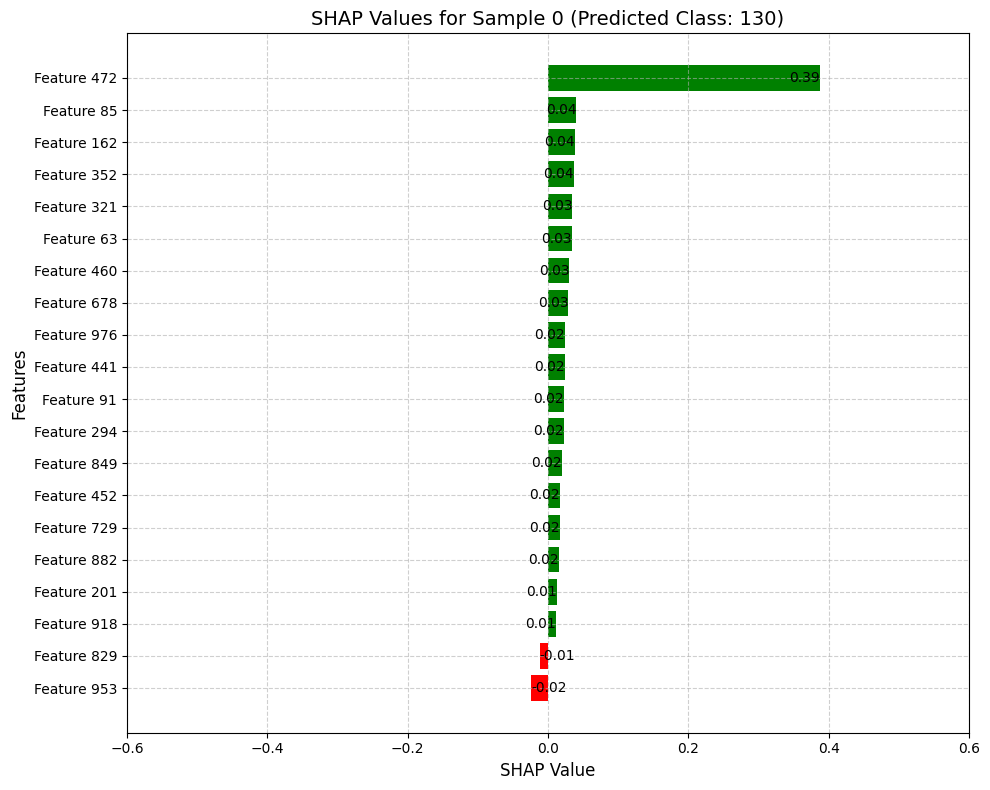

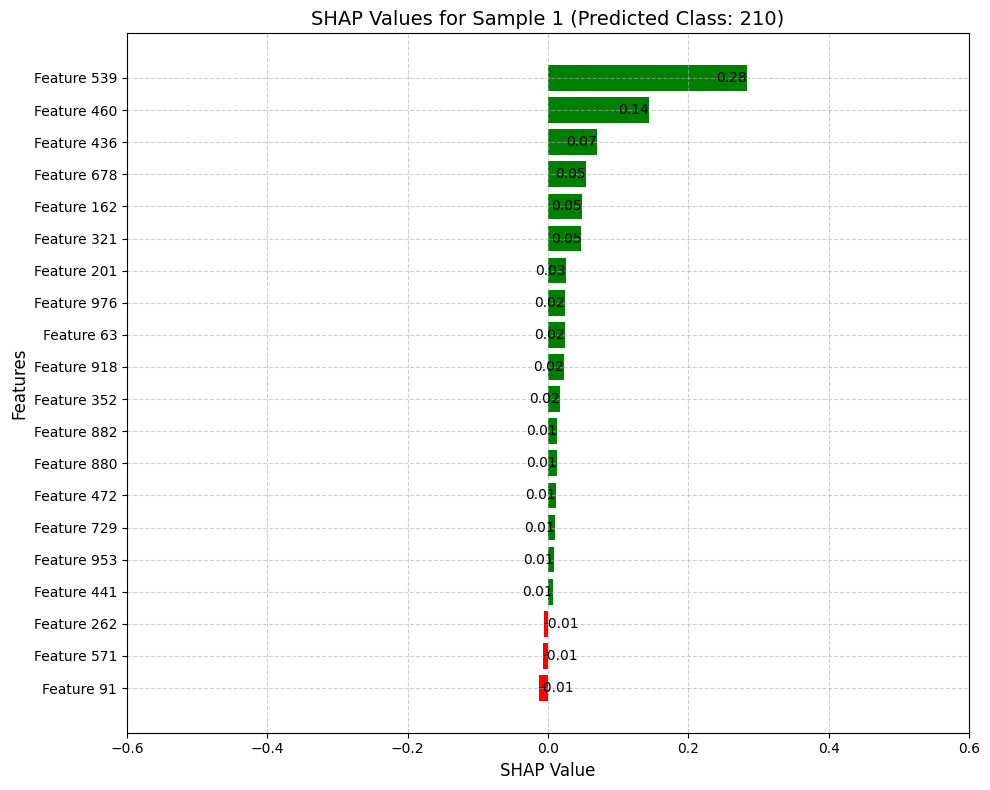

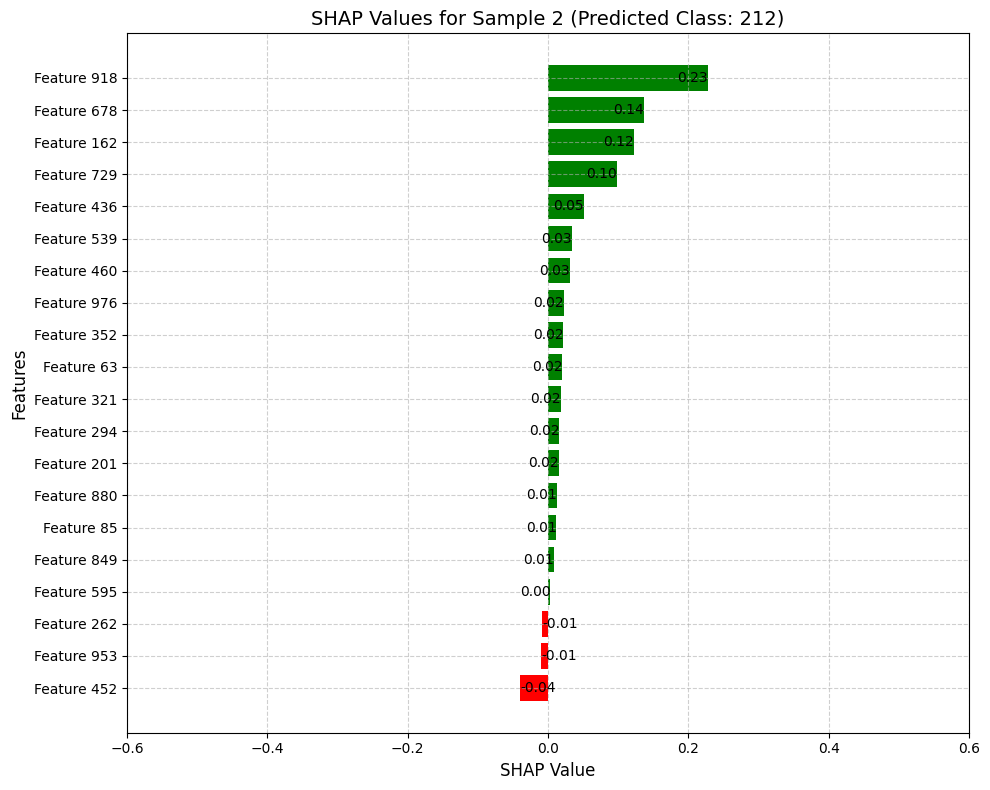

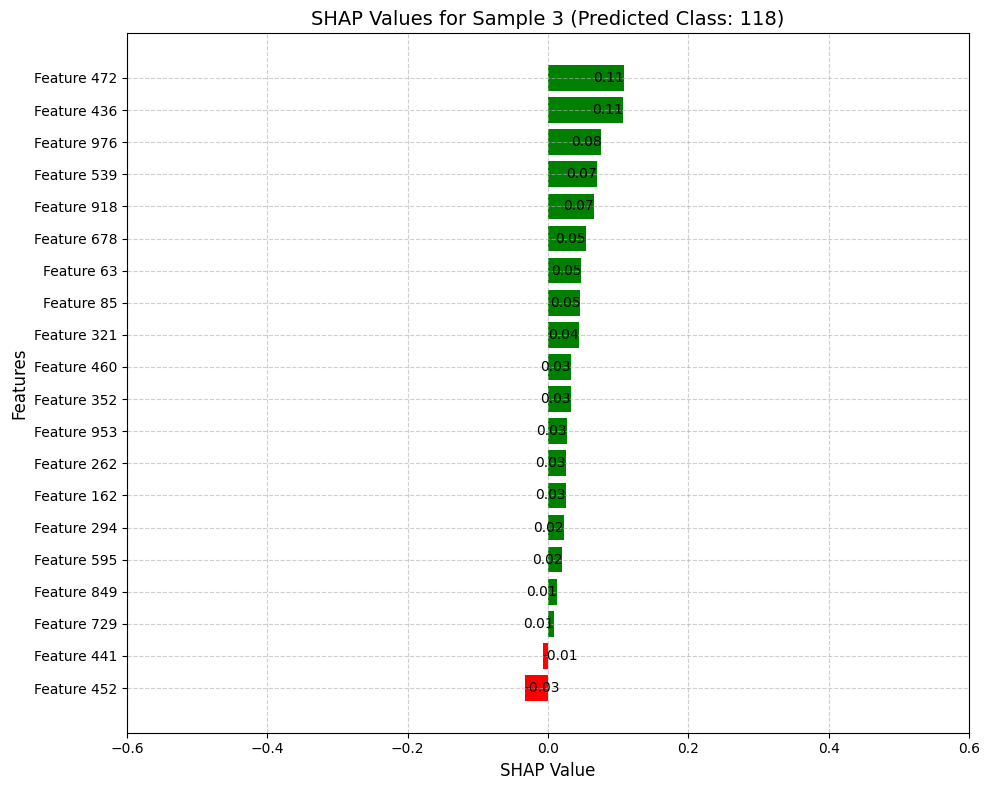

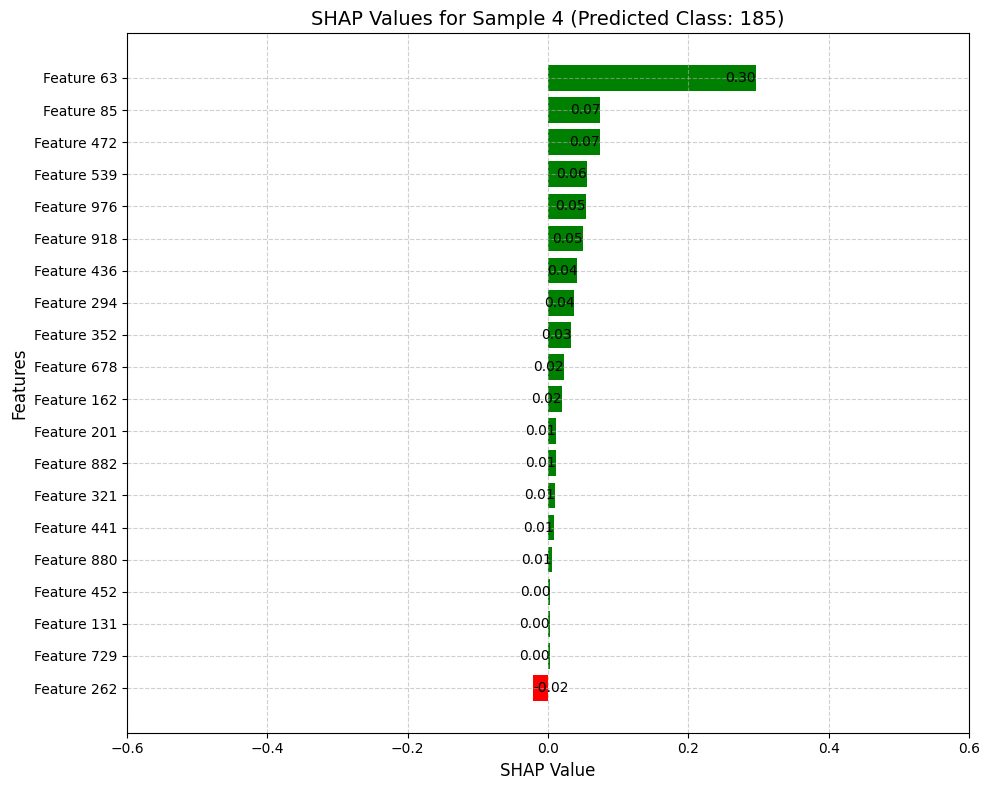

In [20]:
import shap
import numpy as np
import torch
import matplotlib.pyplot as plt
import pandas as pd

# Convert test_x to NumPy
test_x_np = test_x[:5].detach().cpu().numpy()

# Ensure model is in evaluation mode
model.eval()  

# Convert NumPy to Tensor before passing to model
test_x_tensor = torch.tensor(test_x_np, dtype=torch.float32).to(next(model.parameters()).device)

# Get model predictions to check compatibility
with torch.no_grad():
    model_output = model(test_x_tensor)

print(f"Model output shape: {model_output.shape}")  # Debugging

# Define SHAP Explainer
def model_fn(x):
    x_tensor = torch.tensor(x, dtype=torch.float32).to(next(model.parameters()).device)
    with torch.no_grad():
        return model(x_tensor).cpu().numpy()  # Convert output back to NumPy

# Initialize explainer with background data
explainer = shap.Explainer(model_fn, test_x_np)

# Compute SHAP values for all classes
shap_values = explainer(test_x_np)

# Debug shapes
print(f"SHAP values shape: {np.array(shap_values).shape}")  
print(f"Test features shape: {test_x_np.shape}")

# For each sample in the batch, create a visualization
for i in range(len(test_x_np)):
    # Get the SHAP values for this sample (shape: [n_features, n_classes])
    sample_shap = shap_values[i]
    
    # Get the predicted class for this sample
    with torch.no_grad():
        pred_probs = model(torch.tensor(test_x_np[i:i+1], dtype=torch.float32).to(next(model.parameters()).device))
    predicted_class = torch.argmax(pred_probs).item()
    
    # Get SHAP values for the predicted class
    class_shap_values = sample_shap.values[:, predicted_class]
    
    # Create a DataFrame for visualization
    df = pd.DataFrame({
        'Feature': [f'Feature {j}' for j in range(len(class_shap_values))],  # Replace with actual feature names if available
        'SHAP Value': class_shap_values
    })
    
    # Sort by absolute SHAP value and take top 20
    df['Abs_SHAP'] = df['SHAP Value'].abs()
    df = df.sort_values('Abs_SHAP', ascending=False).head(20)
    df = df.sort_values('SHAP Value', ascending=True)
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.barh(df['Feature'], df['SHAP Value'], 
           color=np.where(df['SHAP Value'] > 0, 'green', 'red'))
    
    # Customize the plot
    ax.set_xlabel('SHAP Value', fontsize=12)
    ax.set_ylabel('Features', fontsize=12)
    ax.set_title(f'SHAP Values for Sample {i} (Predicted Class: {predicted_class})', fontsize=14)
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.set_xlim(-0.6, 0.6)  # Match the x-axis range from your example
    
    # Add value labels
    for j, v in enumerate(df['SHAP Value']):
        ax.text(v, j, f"{v:.2f}", color='black', ha='left' if v < 0 else 'right', va='center')
    
    plt.tight_layout()
    plt.show()

In [21]:
checkpoint = torch.load("model.pth", map_location=torch.device('cpu'))
for key, value in checkpoint.items():
    print(f"{key}: {value.shape}")


fc1.weight: torch.Size([8, 980])
fc1.bias: torch.Size([8])
bn1.weight: torch.Size([8])
bn1.bias: torch.Size([8])
bn1.running_mean: torch.Size([8])
bn1.running_var: torch.Size([8])
bn1.num_batches_tracked: torch.Size([])
fc2.weight: torch.Size([8, 8])
fc2.bias: torch.Size([8])
bn2.weight: torch.Size([8])
bn2.bias: torch.Size([8])
bn2.running_mean: torch.Size([8])
bn2.running_var: torch.Size([8])
bn2.num_batches_tracked: torch.Size([])
fc3.weight: torch.Size([219, 8])
fc3.bias: torch.Size([219])


In [22]:
for key, value in model.state_dict().items():
    print(f"{key}: {value.shape}")


fc1.weight: torch.Size([8, 980])
fc1.bias: torch.Size([8])
bn1.weight: torch.Size([8])
bn1.bias: torch.Size([8])
bn1.running_mean: torch.Size([8])
bn1.running_var: torch.Size([8])
bn1.num_batches_tracked: torch.Size([])
fc2.weight: torch.Size([8, 8])
fc2.bias: torch.Size([8])
bn2.weight: torch.Size([8])
bn2.bias: torch.Size([8])
bn2.running_mean: torch.Size([8])
bn2.running_var: torch.Size([8])
bn2.num_batches_tracked: torch.Size([])
fc3.weight: torch.Size([219, 8])
fc3.bias: torch.Size([219])


In [23]:
model.load_state_dict(torch.load("model.pth", map_location=torch.device('cpu')))
model.eval()  # Set model to evaluation mode


NeuralNetwork(
  (fc1): Linear(in_features=980, out_features=8, bias=True)
  (relu1): ReLU()
  (bn1): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout1): Dropout(p=0.2, inplace=False)
  (fc2): Linear(in_features=8, out_features=8, bias=True)
  (relu2): ReLU()
  (bn2): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout2): Dropout(p=0.2, inplace=False)
  (fc3): Linear(in_features=8, out_features=219, bias=True)
  (softmax): Softmax(dim=1)
)

In [24]:
import torch

# Load the checkpoint
checkpoint = torch.load("model.pth", map_location=torch.device('cpu'))

# Load state dictionary
model.load_state_dict(checkpoint)  

# Set to evaluation mode
model.eval()


NeuralNetwork(
  (fc1): Linear(in_features=980, out_features=8, bias=True)
  (relu1): ReLU()
  (bn1): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout1): Dropout(p=0.2, inplace=False)
  (fc2): Linear(in_features=8, out_features=8, bias=True)
  (relu2): ReLU()
  (bn2): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout2): Dropout(p=0.2, inplace=False)
  (fc3): Linear(in_features=8, out_features=219, bias=True)
  (softmax): Softmax(dim=1)
)

In [25]:
print(checkpoint.keys())


odict_keys(['fc1.weight', 'fc1.bias', 'bn1.weight', 'bn1.bias', 'bn1.running_mean', 'bn1.running_var', 'bn1.num_batches_tracked', 'fc2.weight', 'fc2.bias', 'bn2.weight', 'bn2.bias', 'bn2.running_mean', 'bn2.running_var', 'bn2.num_batches_tracked', 'fc3.weight', 'fc3.bias'])


In [26]:
for key, value in model.state_dict().items():
    print(f"{key}: {value.shape}")


fc1.weight: torch.Size([8, 980])
fc1.bias: torch.Size([8])
bn1.weight: torch.Size([8])
bn1.bias: torch.Size([8])
bn1.running_mean: torch.Size([8])
bn1.running_var: torch.Size([8])
bn1.num_batches_tracked: torch.Size([])
fc2.weight: torch.Size([8, 8])
fc2.bias: torch.Size([8])
bn2.weight: torch.Size([8])
bn2.bias: torch.Size([8])
bn2.running_mean: torch.Size([8])
bn2.running_var: torch.Size([8])
bn2.num_batches_tracked: torch.Size([])
fc3.weight: torch.Size([219, 8])
fc3.bias: torch.Size([219])


In [27]:
model.load_state_dict(checkpoint, strict=False)


<All keys matched successfully>

In [28]:
model.eval()

NeuralNetwork(
  (fc1): Linear(in_features=980, out_features=8, bias=True)
  (relu1): ReLU()
  (bn1): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout1): Dropout(p=0.2, inplace=False)
  (fc2): Linear(in_features=8, out_features=8, bias=True)
  (relu2): ReLU()
  (bn2): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout2): Dropout(p=0.2, inplace=False)
  (fc3): Linear(in_features=8, out_features=219, bias=True)
  (softmax): Softmax(dim=1)
)

In [29]:
torch.save(model.state_dict(), "final_model.pth")